

Group A: Anais, Andreea y Mar

Countries assigned:
        Argentina, Russia, Colombia, Chile and Spain


Option C

DONE: 1. Document all steps. Structure your code to keep it cleaned using good practices.

DONE: 2. Collect Coronavirus Data. It is mandatory that in each call, it collects the last updated data.

DONE: 3. Determine and explain if the data is cleaned. If not, then clean it.

DOING: 4. Create an API that returns a Json with the logic explained for your group. The flask server must be executed running the src/api/server.py file.
5. Get the jsons generated from your annexed group and plot it. First, try to connect to the private ip of your annexed group. If it is not possible because of physical issues, then simply use what they generate copying it. If your annexed group cannot give you the necessary json, then annotate it, use the json of another group.

DONE: 6. Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot. If there is no alarm state, then show only the start date.

DONE: 7. Draw the workflow of your program. You can use free tools.

DONE: 8. Per country, which are the columns that are more related find the correlation between columns with the correlation matrix.

DONE: 9. Use a different github repository adding all group participants with write permissions. Use that repository to manage the delivery code and resources. It is mandatory that every student of the group does, at least,five commits/push.

DONE: 10. Answer the questions:
        a. What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?
        b. What can you conclude about your data study?
        c. Are there outliers or some rare data?

DOING:

Our API must offer data to Group B and receive it from Group F, as follows:

    We have to offer a json(df):
    - Group A: it must return a json with one key “n_c_averages” that represents
    the mean of the “new_cases” per day of all of your countries.


    We should receive a json(df):
    - Group F: it must return a json with one key “n_t_averages” that represents the
    mean of the “new_tests” per day of all your countries.
    
Option B:
DOING:
1. Draw, in different colors and vertically, the moments when the daily death curve increases and decreases.
2. Create with bars, lines, points and pie charts the daily deaths and infected.
3. Research to save each plot in local files. Save them on different folders for each country.
4. When are the worst moments to go to the countries? Answer this referring to the “per_million” columns.


In [1]:
#importamos librerias y funciones
import pandas as pd
import seaborn as sns
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from utils.folders_tb import jsonlink_df

from utils.mining_data_tb import filter_df, df_covid, datetime, data_complete_clean, data_paises_clean, group, sort_columns, dont_travel_to,replace_outlier_with_nan,pivot_table_from_df

from utils.visualization_tb import heatmap_df, detect_outliers_df, plot_clean_columns,remove_outlier,boxplots_per_country,heatmap_with_column_filters,position_countries,columns_correlation_pivot, heatmap_per_country, plotly_dont_travel_to


Option C
2. Collect Coronavirus Data. It is mandatory that in each call, it collects the last updated data. 
DONE: All our data is collected through json url's from the provided link.

In [2]:
#Dataset total limpio 
covid_complete= data_complete_clean()
covid_complete

location  population  life_expectancy  data.date  data.total_cases  \
0      Afghanistan  38928341.0            64.83 2020-02-24               1.0   
1      Afghanistan  38928341.0            64.83 2020-02-25               1.0   
2      Afghanistan  38928341.0            64.83 2020-02-26               1.0   
3      Afghanistan  38928341.0            64.83 2020-02-27               1.0   
4      Afghanistan  38928341.0            64.83 2020-02-28               1.0   
...            ...         ...              ...        ...               ...   
61689     Zimbabwe  14862927.0            61.49 2021-01-20           29408.0   
61690     Zimbabwe  14862927.0            61.49 2021-01-21           30047.0   
61691     Zimbabwe  14862927.0            61.49 2021-01-22           30523.0   
61692     Zimbabwe  14862927.0            61.49 2021-01-23           31007.0   
61693     Zimbabwe  14862927.0            61.49 2021-01-24           31320.0   

       data.new_cases  data.total_cases_per_million  \
0                 1.0                         0.026   
1                 0.0                         0.026   
2                 0.0                         0.026   
3                 0.0                         0.026   
4                 0.0                         0.026   
...               ...                           ...   
61689           733.0                      1978.614   
61690           639.0                      2021.607   
61691           476.0                      2053.633   
61692           484.0                      2086.197   
61693           313.0                      2107.257   

       data.new_cases_per_million  data.stringency_index  \
0                           0.026                   8.33   
1                           0.000                   8.33   
2                           0.000                   8.33   
3                           0.000                   8.33   
4                           0.000                   8.33   
...                           ...                    ...   
61689                      49.317                    NaN   
61690                      42.993                    NaN   
61691                      32.026                    NaN   
61692                      32.564                    NaN   
61693                      21.059                    NaN   

       data.new_cases_smoothed  ...  data.reproduction_rate  data.total_tests  \
0                          NaN  ...                     NaN               NaN   
1                          NaN  ...                     NaN               NaN   
2                          NaN  ...                     NaN               NaN   
3                          NaN  ...                     NaN               NaN   
4                          NaN  ...                     NaN               NaN   
...                        ...  ...                     ...               ...   
61689                  736.000  ...                     NaN          285054.0   
61690                  668.429  ...                     NaN               NaN   
61691                  630.571  ...                     NaN               NaN   
61692                  589.429  ...                     NaN               NaN   
61693                  588.143  ...                     NaN               NaN   

       data.total_tests_per_thousand  data.tests_units  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
...                              ...               ...   
61689                         19.179   tests performed   
61690                            NaN               NaN   
61691                            NaN               NaN   
61692                            NaN               NaN   
61693                            NaN               NaN  

In [3]:
#Dataset limpio filtrado por nuestros paises
covid_paises= data_paises_clean()
covid_paises

location  population  life_expectancy  data.date  data.total_tests  \
0     Argentina  45195777.0            76.67 2020-01-01               4.0   
1     Argentina  45195777.0            76.67 2020-01-02              25.0   
2     Argentina  45195777.0            76.67 2020-01-03              30.0   
3     Argentina  45195777.0            76.67 2020-01-04              43.0   
4     Argentina  45195777.0            76.67 2020-01-05              53.0   
...         ...         ...              ...        ...               ...   
1766      Spain  46754783.0            83.56 2021-01-20               NaN   
1767      Spain  46754783.0            83.56 2021-01-21               NaN   
1768      Spain  46754783.0            83.56 2021-01-22               NaN   
1769      Spain  46754783.0            83.56 2021-01-23               NaN   
1770      Spain  46754783.0            83.56 2021-01-24               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                4.0                          0.000   
1               21.0                          0.001   
2                5.0                          0.001   
3               13.0                          0.001   
4               10.0                          0.001   
...              ...                            ...   
1766             NaN                            NaN   
1767             NaN                            NaN   
1768             NaN                            NaN   
1769             NaN                            NaN   
1770             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             0.0    people tested                    0.0   
1                             0.0    people tested                    0.0   
2                             0.0    people tested                    0.0   
3                             0.0    people tested                    0.0   
4                             0.0    people tested                    0.0   
...                           ...              ...                    ...   
1766                          NaN              NaN                   71.3   
1767                          NaN              NaN                    NaN   
1768                          NaN              NaN                    NaN   
1769                          NaN              NaN                    NaN   
1770                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...                NaN              NaN                       NaN   
1     ...                NaN              NaN                       NaN   
2     ...                NaN              NaN                       NaN   
3     ...                NaN              NaN                       NaN   
4     ...                NaN              NaN                       NaN   
...   ...                ...              ...                       ...   
1766  ...            54637.0            464.0                   251.286   
1767  ...            55041.0            404.0                   280.286   
1768  ...            55441.0            400.0                   303.857   
1769  ...            55441.0              0.0                   303.857   
1770  ...            55441.0              0.0                   303.857   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                     NaN                            NaN   
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
...                                   ...                            ...   
1766                              721.787                      

In [4]:
#Importamos el dataset actualizado
covid = jsonlink_df('https://covid.ourworldindata.org/data/owid-covid-data.json').T
covid

continent     location    population population_density median_age  \
AFG           Asia  Afghanistan    38928341.0             54.422       18.6   
ALB         Europe      Albania     2877800.0            104.871       38.0   
DZA         Africa      Algeria    43851043.0             17.348       29.1   
AND         Europe      Andorra       77265.0            163.755        NaN   
AGO         Africa       Angola    32866268.0             23.890       16.8   
...            ...          ...           ...                ...        ...   
VNM           Asia      Vietnam    97338583.0            308.127       32.6   
OWID_WRL       NaN        World  7794798729.0             58.045       30.9   
YEM           Asia        Yemen    29825968.0             53.508       20.3   
ZMB         Africa       Zambia    18383956.0             22.995       17.7   
ZWE         Africa     Zimbabwe    14862927.0             42.729       19.6   

         aged_65_older aged_70_older gdp_per_capita cardiovasc_death_rate  \
AFG              2.581         1.337       1803.987               597.029   
ALB             13.188         8.643      11803.431               304.195   
DZA              6.211         3.857      13913.839               278.364   
AND                NaN           NaN            NaN               109.135   
AGO              2.405         1.362       5819.495               276.045   
...                ...           ...            ...                   ...   
VNM              7.150         4.718       6171.884               245.465   
OWID_WRL         8.696         5.355      15469.207               233.070   
YEM              2.922         1.583       1479.147               495.003   
ZMB              2.480         1.542       3689.251               234.499   
ZWE              2.822         1.882       1899.775               307.846   

         diabetes_prevalence handwashing_facilities  \
AFG                     9.59                 37.746   
ALB                    10.08                    NaN   
DZA                     6.73                 83.741   
AND                     7.97                    NaN   
AGO                     3.94                 26.664   
...                      ...                    ...   
VNM                     6.00                 85.847   
OWID_WRL                8.51                 60.130   
YEM                     5.35                 49.542   
ZMB                     3.94                 13.938   
ZWE                     1.82                 36.791   

         hospital_beds_per_thousand life_expectancy human_development_index  \
AFG                           0.500           64.83                   0.498   
ALB                           2.890           78.57                   0.785   
DZA                           1.900           76.88                   0.754   
AND                             NaN           83.73                   0.858   
AGO                             NaN           61.15                   0.581   
...                             ...             ...                     ...   
VNM                           2.600           75.40                   0.694   
OWID_WRL                      2.705           72.58                     NaN   
YEM                           0.700           66.12                   0.452   
ZMB                           2.000           63.89                   0.588   
ZWE                           1.700           61.49                   0.535   

                                                       data extreme_poverty  \
AFG       [{'date': '2020-02-24', 'total_cases': 1.0, 'n...             NaN   
ALB       [{'date': '2020-03-09', 'total_cases': 2.0, 'n...             1.1   
DZA       [{'date': '2020-02-25', 'total_cases': 1.0, 'n...             0.5   
AND       [{'date': '2020-03-02', 'total_cases': 1.0, 'n...             NaN   
AGO       [{'date': '2020-03-20', 'total_cases': 1.0, 'n...             NaN   
...                                                

We create a dataframe called COVID with the assigned countries for our group.

Group A: Anais, Andreea y Mar

Countries assigned: Argentina, Russia, Colombia, Chile and Spain

In [5]:
#Filtramos nuestros paises
covid=filter_df(covid,'location','Argentina','Russia', 'Colombia', 'Chile', 'Spain')
covid

continent   location   population population_density median_age  \
ARG  South America  Argentina   45195777.0             16.177       31.9   
CHL  South America      Chile   19116209.0             24.282       35.4   
COL  South America   Colombia   50882884.0             44.223       32.2   
RUS         Europe     Russia  145934460.0              8.823       39.6   
ESP         Europe      Spain   46754783.0             93.105       45.5   

    aged_65_older aged_70_older gdp_per_capita cardiovasc_death_rate  \
ARG        11.198         7.441      18933.907               191.032   
CHL        11.087         6.938      22767.037               127.993   
COL         7.646         4.312      13254.949               124.240   
RUS        14.178         9.393      24765.954               431.297   
ESP        19.436        13.799      34272.360                99.403   

    diabetes_prevalence handwashing_facilities hospital_beds_per_thousand  \
ARG                5.50                    NaN                       5.00   
CHL                8.46                    NaN                       2.11   
COL                7.44                 65.386                       1.71   
RUS                6.18                    NaN                       8.05   
ESP                7.17                    NaN                       2.97   

    life_expectancy human_development_index  \
ARG           76.67                   0.825   
CHL           80.18                   0.843   
COL           77.29                   0.747   
RUS           72.58                   0.816   
ESP           83.56                   0.891   

                                                  data extreme_poverty  \
ARG  [{'date': '2020-01-01', 'total_tests': 4.0, 'n...             0.6   
CHL  [{'date': '2020-02-23', 'total_cases': 2.0, 'n...             1.3   
COL  [{'date': '2020-03-06', 'total_cases': 1.0, 'n...             4.5   
RUS  [{'date': '2020-01-31', 'total_cases': 2.0, 'n...             0.1   
ESP  [{'date': '2020-02-01', 'total_cases': 1.0, 'n...             1.0   

    female_smokers male_smokers  
ARG           16.2         27.7  
CHL           34.2         41.5  
COL            4.7         13.5  
RUS           23.4         58.3  
ESP           27.4         31.4

In [6]:
#Extraemos la columna "data"
covid=df_covid(covid,val1="data")
covid

continent   location  population  population_density  median_age  \
0     South America  Argentina  45195777.0              16.177        31.9   
1     South America  Argentina  45195777.0              16.177        31.9   
2     South America  Argentina  45195777.0              16.177        31.9   
3     South America  Argentina  45195777.0              16.177        31.9   
4     South America  Argentina  45195777.0              16.177        31.9   
...             ...        ...         ...                 ...         ...   
1766         Europe      Spain  46754783.0              93.105        45.5   
1767         Europe      Spain  46754783.0              93.105        45.5   
1768         Europe      Spain  46754783.0              93.105        45.5   
1769         Europe      Spain  46754783.0              93.105        45.5   
1770         Europe      Spain  46754783.0              93.105        45.5   

      aged_65_older  aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
0            11.198          7.441       18933.907                191.032   
1            11.198          7.441       18933.907                191.032   
2            11.198          7.441       18933.907                191.032   
3            11.198          7.441       18933.907                191.032   
4            11.198          7.441       18933.907                191.032   
...             ...            ...             ...                    ...   
1766         19.436         13.799       34272.360                 99.403   
1767         19.436         13.799       34272.360                 99.403   
1768         19.436         13.799       34272.360                 99.403   
1769         19.436         13.799       34272.360                 99.403   
1770         19.436         13.799       34272.360                 99.403   

      diabetes_prevalence  ...  data.new_vaccinations_smoothed_per_million  \
0                    5.50  ...                                         NaN   
1                    5.50  ...                                         NaN   
2                    5.50  ...                                         NaN   
3                    5.50  ...                                         NaN   
4                    5.50  ...                                         NaN   
...                   ...  ...                                         ...   
1766                 7.17  ...                                      1358.0   
1767                 7.17  ...                                      1305.0   
1768                 7.17  ...                                      1213.0   
1769                 7.17  ...                                         NaN   
1770                 7.17  ...                                         NaN   

      data.new_vaccinations  data.weekly_icu_admissions  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
...                     ...                         ...   
1766                59840.0                         NaN   
1767                77364.0                         NaN   
1768                62524.0                         NaN   
1769                    NaN                         NaN   
1770                    NaN                         NaN   

      data.weekly_icu_admissions_per_million  data.weekly_hosp_admissions  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                     

In [7]:
#Cambiamos la columna date a tipo datetime
covid= datetime(dt=covid, val1="data.date")
covid

continent   location  population  population_density  median_age  \
0     South America  Argentina  45195777.0              16.177        31.9   
1     South America  Argentina  45195777.0              16.177        31.9   
2     South America  Argentina  45195777.0              16.177        31.9   
3     South America  Argentina  45195777.0              16.177        31.9   
4     South America  Argentina  45195777.0              16.177        31.9   
...             ...        ...         ...                 ...         ...   
1766         Europe      Spain  46754783.0              93.105        45.5   
1767         Europe      Spain  46754783.0              93.105        45.5   
1768         Europe      Spain  46754783.0              93.105        45.5   
1769         Europe      Spain  46754783.0              93.105        45.5   
1770         Europe      Spain  46754783.0              93.105        45.5   

      aged_65_older  aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
0            11.198          7.441       18933.907                191.032   
1            11.198          7.441       18933.907                191.032   
2            11.198          7.441       18933.907                191.032   
3            11.198          7.441       18933.907                191.032   
4            11.198          7.441       18933.907                191.032   
...             ...            ...             ...                    ...   
1766         19.436         13.799       34272.360                 99.403   
1767         19.436         13.799       34272.360                 99.403   
1768         19.436         13.799       34272.360                 99.403   
1769         19.436         13.799       34272.360                 99.403   
1770         19.436         13.799       34272.360                 99.403   

      diabetes_prevalence  ...  data.new_vaccinations_smoothed_per_million  \
0                    5.50  ...                                         NaN   
1                    5.50  ...                                         NaN   
2                    5.50  ...                                         NaN   
3                    5.50  ...                                         NaN   
4                    5.50  ...                                         NaN   
...                   ...  ...                                         ...   
1766                 7.17  ...                                      1358.0   
1767                 7.17  ...                                      1305.0   
1768                 7.17  ...                                      1213.0   
1769                 7.17  ...                                         NaN   
1770                 7.17  ...                                         NaN   

      data.new_vaccinations  data.weekly_icu_admissions  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
...                     ...                         ...   
1766                59840.0                         NaN   
1767                77364.0                         NaN   
1768                62524.0                         NaN   
1769                    NaN                         NaN   
1770                    NaN                         NaN   

      data.weekly_icu_admissions_per_million  data.weekly_hosp_admissions  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                     

Option C: 3. Determine and explain if the data is cleaned. If not, then clean it.

In [8]:
#vemos las caracteristicas de nuestro dataframe y buscamos si hay valores NaN
covid.info()
covid.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   1771 non-null   object        
 1   location                                    1771 non-null   object        
 2   population                                  1771 non-null   float64       
 3   population_density                          1771 non-null   float64       
 4   median_age                                  1771 non-null   float64       
 5   aged_65_older                               1771 non-null   float64       
 6   aged_70_older                               1771 non-null   float64       
 7   gdp_per_capita                              1771 non-null   float64       
 8   cardiovasc_death_rate                       1771 non-null   float64       
 9   diabetes

data.new_vaccinations                         1743
data.total_vaccinations                       1725
data.total_vaccinations_per_hundred           1725
data.weekly_icu_admissions_per_million        1720
data.weekly_icu_admissions                    1720
data.weekly_hosp_admissions_per_million       1720
data.weekly_hosp_admissions                   1720
data.hosp_patients_per_million                1672
data.icu_patients                             1672
data.icu_patients_per_million                 1672
data.hosp_patients                            1672
data.new_vaccinations_smoothed_per_million    1669
data.new_vaccinations_smoothed                1669
handwashing_facilities                        1446
data.new_tests_per_thousand                    595
data.new_tests                                 595
data.total_tests                               542
data.total_tests_per_thousand                  542
data.tests_per_case                            363
data.positive_rate             

In [9]:
#eliminamos columnas con muchos Nan
covid= covid.drop(["continent", "extreme_poverty", "human_development_index","hospital_beds_per_thousand", "diabetes_prevalence","female_smokers","cardiovasc_death_rate", "aged_70_older", "aged_65_older", "median_age", "population_density", "gdp_per_capita", "male_smokers","data.new_vaccinations","data.total_vaccinations_per_hundred","data.total_vaccinations","data.weekly_hosp_admissions_per_million","data.weekly_hosp_admissions","data.weekly_icu_admissions_per_million","data.weekly_icu_admissions","data.new_vaccinations_smoothed","data.new_vaccinations_smoothed_per_million","data.hosp_patients","data.hosp_patients_per_million","data.icu_patients","data.icu_patients_per_million","handwashing_facilities"],axis=1)
covid

location  population  life_expectancy  data.date  data.total_tests  \
0     Argentina  45195777.0            76.67 2020-01-01               4.0   
1     Argentina  45195777.0            76.67 2020-01-02              25.0   
2     Argentina  45195777.0            76.67 2020-01-03              30.0   
3     Argentina  45195777.0            76.67 2020-01-04              43.0   
4     Argentina  45195777.0            76.67 2020-01-05              53.0   
...         ...         ...              ...        ...               ...   
1766      Spain  46754783.0            83.56 2021-01-20               NaN   
1767      Spain  46754783.0            83.56 2021-01-21               NaN   
1768      Spain  46754783.0            83.56 2021-01-22               NaN   
1769      Spain  46754783.0            83.56 2021-01-23               NaN   
1770      Spain  46754783.0            83.56 2021-01-24               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                4.0                          0.000   
1               21.0                          0.001   
2                5.0                          0.001   
3               13.0                          0.001   
4               10.0                          0.001   
...              ...                            ...   
1766             NaN                            NaN   
1767             NaN                            NaN   
1768             NaN                            NaN   
1769             NaN                            NaN   
1770             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             0.0    people tested                    0.0   
1                             0.0    people tested                    0.0   
2                             0.0    people tested                    0.0   
3                             0.0    people tested                    0.0   
4                             0.0    people tested                    0.0   
...                           ...              ...                    ...   
1766                          NaN              NaN                   71.3   
1767                          NaN              NaN                    NaN   
1768                          NaN              NaN                    NaN   
1769                          NaN              NaN                    NaN   
1770                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...                NaN              NaN                       NaN   
1     ...                NaN              NaN                       NaN   
2     ...                NaN              NaN                       NaN   
3     ...                NaN              NaN                       NaN   
4     ...                NaN              NaN                       NaN   
...   ...                ...              ...                       ...   
1766  ...            54637.0            464.0                   251.286   
1767  ...            55041.0            404.0                   280.286   
1768  ...            55441.0            400.0                   303.857   
1769  ...            55441.0              0.0                   303.857   
1770  ...            55441.0              0.0                   303.857   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                     NaN                            NaN   
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
...                                   ...                            ...   
1766                              721.787                      

In [10]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests                          595
data.new_tests_per_thousand             595
data.total_tests                        542
data.total_tests_per_thousand           542
data.tests_per_case                     363
data.positive_rate                      363
data.new_tests_smoothed                 300
data.new_tests_smoothed_per_thousand    300
data.reproduction_rate                  273
data.tests_units                        265
data.new_deaths_per_million             190
data.total_deaths_per_million           190
data.total_deaths                       190
data.new_deaths                         190
data.new_cases_smoothed_per_million      87
data.new_deaths_smoothed                 87
data.new_cases_smoothed                  87
data.new_deaths_smoothed_per_million     87
data.new_cases                           62
data.new_cases_per_million               62
data.total_cases_per_million             62
data.total_cases                         62
data.stringency_index           

Option C: 10.c. Are there outliers or some rare data?

We check for outliers per country

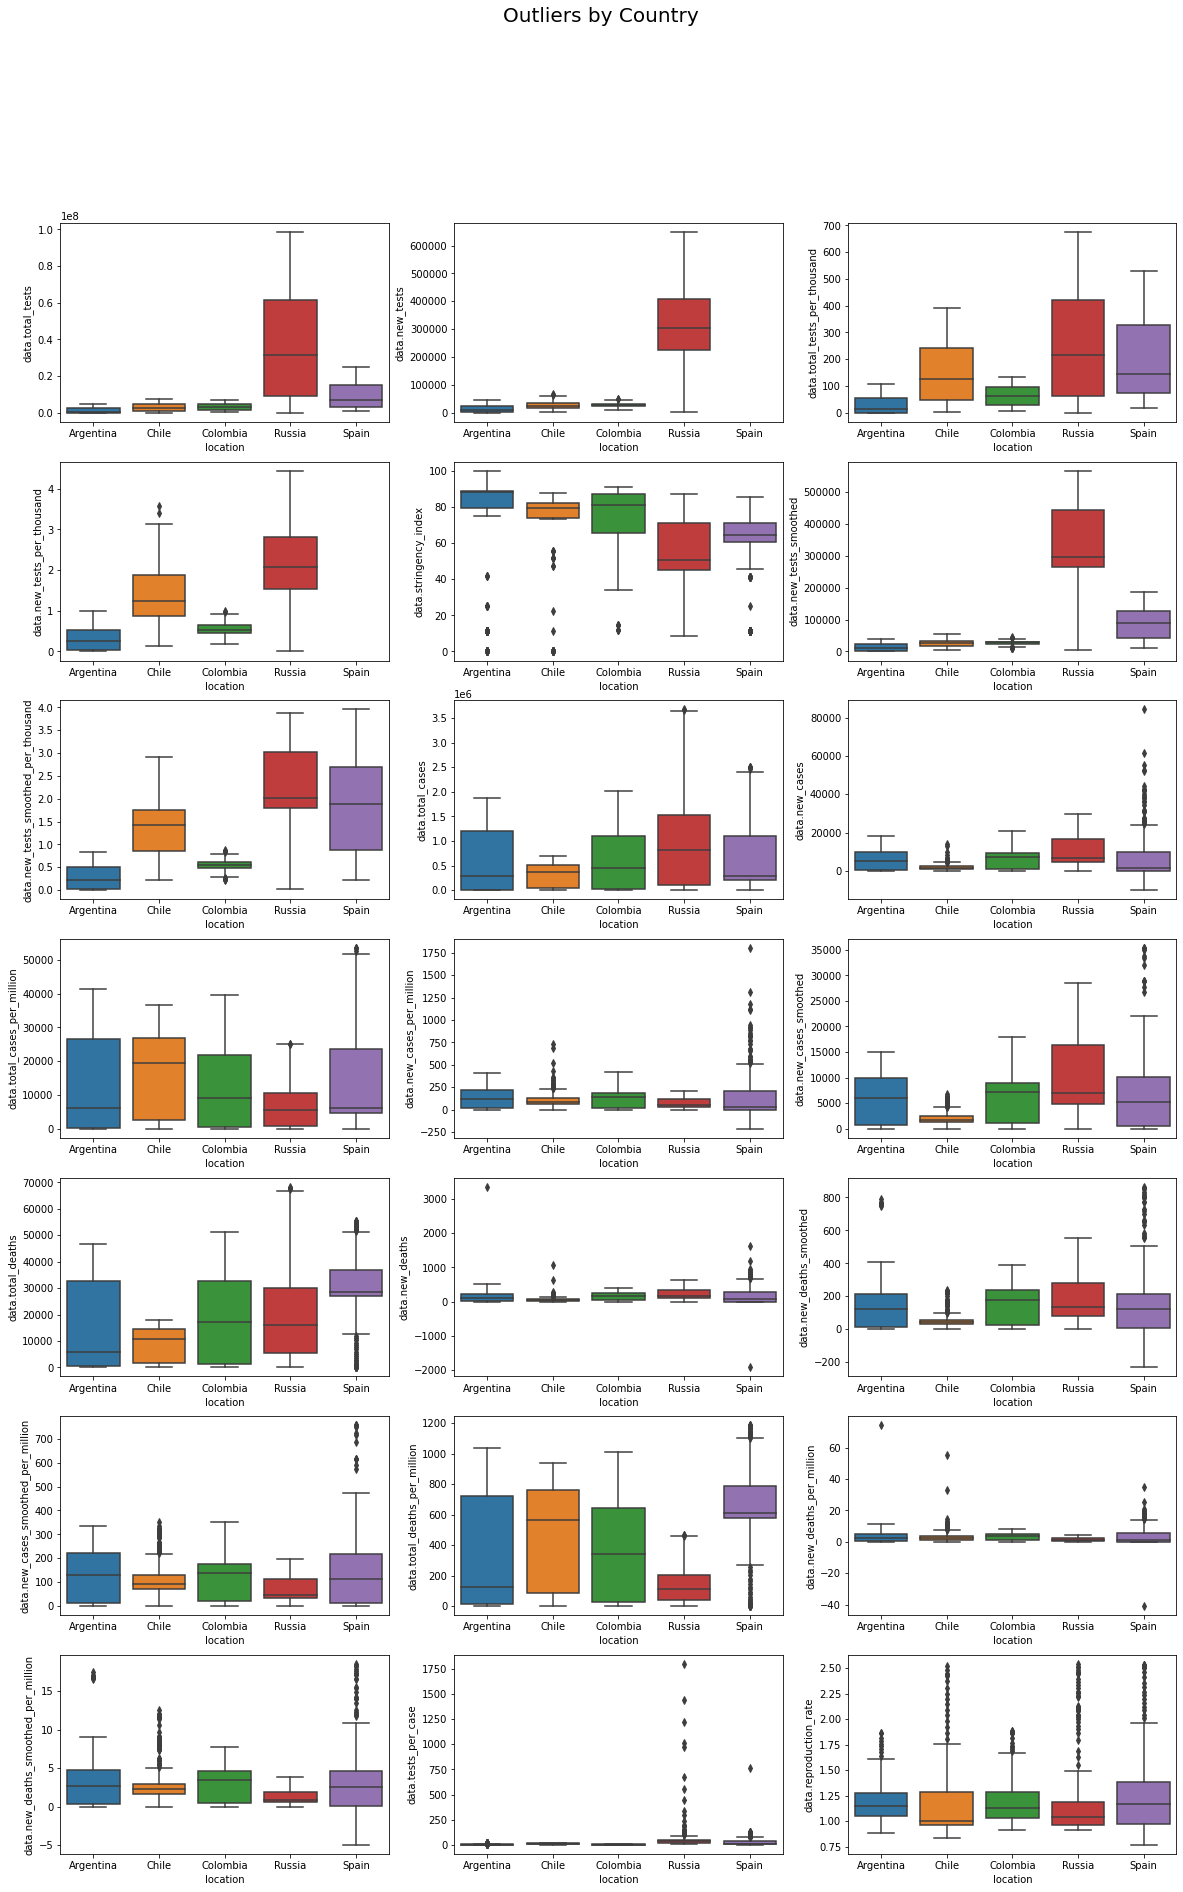

In [11]:
#veo los outliers de todas las columnas excepto 'location', 'population', 'life_expectancy', 'data.date','data.tests_units'
boxplots_per_country(covid,'inicial')

We split our Dataframe in order to eliminate the outliers per column and per country

In [12]:
# quitamos los outliers para Argentina
print("Muestra inicial del grupo de 5 paises:",covid.shape)
covid_argentina=covid[covid['location']=='Argentina']
print("Muestra inicial de Argentina:",covid_argentina.shape)
covid_argentina=replace_outlier_with_nan(covid_argentina,'data.stringency_index')
covid_argentina=replace_outlier_with_nan(covid_argentina,'data.new_deaths_per_million')
covid_argentina=replace_outlier_with_nan(covid_argentina,'data.new_deaths')
covid_argentina=replace_outlier_with_nan(covid_argentina,'data.new_deaths_per_million')
print("Datos sin outliers Argentina:",covid_argentina.shape)

Muestra inicial del grupo de 5 paises: (1771, 27)
Muestra inicial de Argentina: (390, 27)
Datos sin outliers Argentina: (316, 27)


In [13]:
# quitamos los outliers para España
print("Muestra inicial del grupo de 5 paises:",covid.shape)
covid_spain=covid[covid['location']=='Spain']
print("Muestra inicial de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.stringency_index')
print("Datos sin outliers de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.new_cases')
print("Datos sin outliers de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.new_cases_per_million')
print("Datos sin outliers de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.new_cases_smoothed')
print("Datos sin outliers de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.new_deaths')
print("Datos sin outliers de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.new_cases_smoothed_per_million')
print("Datos sin outliers de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.new_deaths_per_million')
print("Datos sin outliers de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.new_deaths_smoothed_per_million')
print("Datos sin outliers de España:",covid_spain.shape)
covid_spain=replace_outlier_with_nan(covid_spain, 'data.tests_per_case')
print("Datos sin outliers de España:",covid_spain.shape)

Muestra inicial del grupo de 5 paises: (1771, 27)
Muestra inicial de España: (359, 27)
Datos sin outliers de España: (355, 27)
Datos sin outliers de España: (355, 27)
Datos sin outliers de España: (355, 27)
Datos sin outliers de España: (350, 27)
Datos sin outliers de España: (324, 27)
Datos sin outliers de España: (324, 27)
Datos sin outliers de España: (324, 27)
Datos sin outliers de España: (324, 27)
Datos sin outliers de España: (270, 27)


In [14]:
# quitamos los outliers para Chile
print("Muestra inicial del grupo de 5 paises:",covid.shape)
covid_chile=covid[covid['location']=='Chile']
print("Muestra inicial de Chile:",covid_chile.shape)
covid_chile=replace_outlier_with_nan(covid_chile,'data.stringency_index')
covid_chile=replace_outlier_with_nan(covid_chile,'data.new_cases_per_million')
covid_chile=replace_outlier_with_nan(covid_chile,'data.new_deaths')
covid_chile=replace_outlier_with_nan(covid_chile,'data.new_deaths_smoothed_per_million')
print("Datos sin outliers Chile:",covid_chile.shape)

Muestra inicial del grupo de 5 paises: (1771, 27)
Muestra inicial de Chile: (337, 27)
Datos sin outliers Chile: (302, 27)


In [15]:
# quitamos los outliers para Rusia
print("Muestra inicial del grupo de 5 paises:",covid.shape)
covid_russia=covid[covid['location']=='Russia']
print("Muestra inicial de Rusia:",covid_russia.shape)
covid_russia=replace_outlier_with_nan(covid_russia,'data.tests_per_case')
print("Datos sin outliers Rusia:",covid_russia.shape)

Muestra inicial del grupo de 5 paises: (1771, 27)
Muestra inicial de Rusia: (360, 27)
Datos sin outliers Rusia: (317, 27)


In [16]:
# quitamos los outliers para Colombia
print("Muestra inicial del grupo de 5 paises:",covid.shape)
covid_colombia=covid[covid['location']=='Colombia']
print("Muestra inicial de Colombia:",covid_colombia.shape)
covid_colombia=replace_outlier_with_nan(covid_colombia,'data.stringency_index')
print("Datos sin outliers Colombia:",covid_colombia.shape)

Muestra inicial del grupo de 5 paises: (1771, 27)
Muestra inicial de Colombia: (325, 27)
Datos sin outliers Colombia: (325, 27)


In [17]:
#juntamos los datos limpios
covid=pd.concat([covid_spain,covid_argentina,covid_russia,covid_chile,covid_colombia], ignore_index=True)
print("Datos sin outliers del grupo de 5 paises",covid.shape)
covid.reset_index()

Datos sin outliers del grupo de 5 paises (1530, 27)


index  location  population  life_expectancy  data.date  \
0         0     Spain  46754783.0            83.56 2020-04-20   
1         1     Spain  46754783.0            83.56 2020-04-21   
2         2     Spain  46754783.0            83.56 2020-04-22   
3         3     Spain  46754783.0            83.56 2020-04-23   
4         4     Spain  46754783.0            83.56 2020-04-24   
...     ...       ...         ...              ...        ...   
1525   1525  Colombia  50882884.0            77.29 2020-03-07   
1526   1526  Colombia  50882884.0            77.29 2020-03-08   
1527   1527  Colombia  50882884.0            77.29 2020-03-09   
1528   1528  Colombia  50882884.0            77.29 2020-03-10   
1529   1529  Colombia  50882884.0            77.29 2020-03-11   

      data.total_tests  data.new_tests  data.total_tests_per_thousand  \
0                  NaN             NaN                            NaN   
1                  NaN             NaN                            NaN   
2                  NaN             NaN                            NaN   
3            1035522.0             NaN                         22.148   
4                  NaN             NaN                            NaN   
...                ...             ...                            ...   
1525               NaN             NaN                            NaN   
1526               NaN             NaN                            NaN   
1527               NaN             NaN                            NaN   
1528               NaN             NaN                            NaN   
1529               NaN             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  ...  data.total_deaths  \
0                             NaN  tests performed  ...            20852.0   
1                             NaN  tests performed  ...            21282.0   
2                             NaN  tests performed  ...            21717.0   
3                             NaN  tests performed  ...            22157.0   
4                             NaN  tests performed  ...            22524.0   
...                           ...              ...  ...                ...   
1525                          NaN              NaN  ...                NaN   
1526                          NaN              NaN  ...                NaN   
1527                          NaN              NaN  ...                NaN   
1528                          NaN              NaN  ...                NaN   
1529                          NaN              NaN  ...                NaN   

      data.new_deaths  data.new_deaths_smoothed  \
0               399.0                   442.286   
1               430.0                   460.857   
2               435.0                   429.857   
3               440.0                   406.000   
4               367.0                   360.286   
...               ...                       ...   
1525              NaN                       NaN   
1526              NaN                       NaN   
1527              NaN                       NaN   
1528              NaN                       NaN   
1529              NaN                     0.000   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                  92.003                        445.986   
1                                  96.665                        455.183   
2                                  93.940                        464.487   
3                                  85.785                        473.898   
4                                  37.127                        481.748   
...                                   ...                            ...   
1525                                  NaN                            NaN   
1526                                  NaN                            NaN   
1527                                  NaN                            NaN   
1528                                  

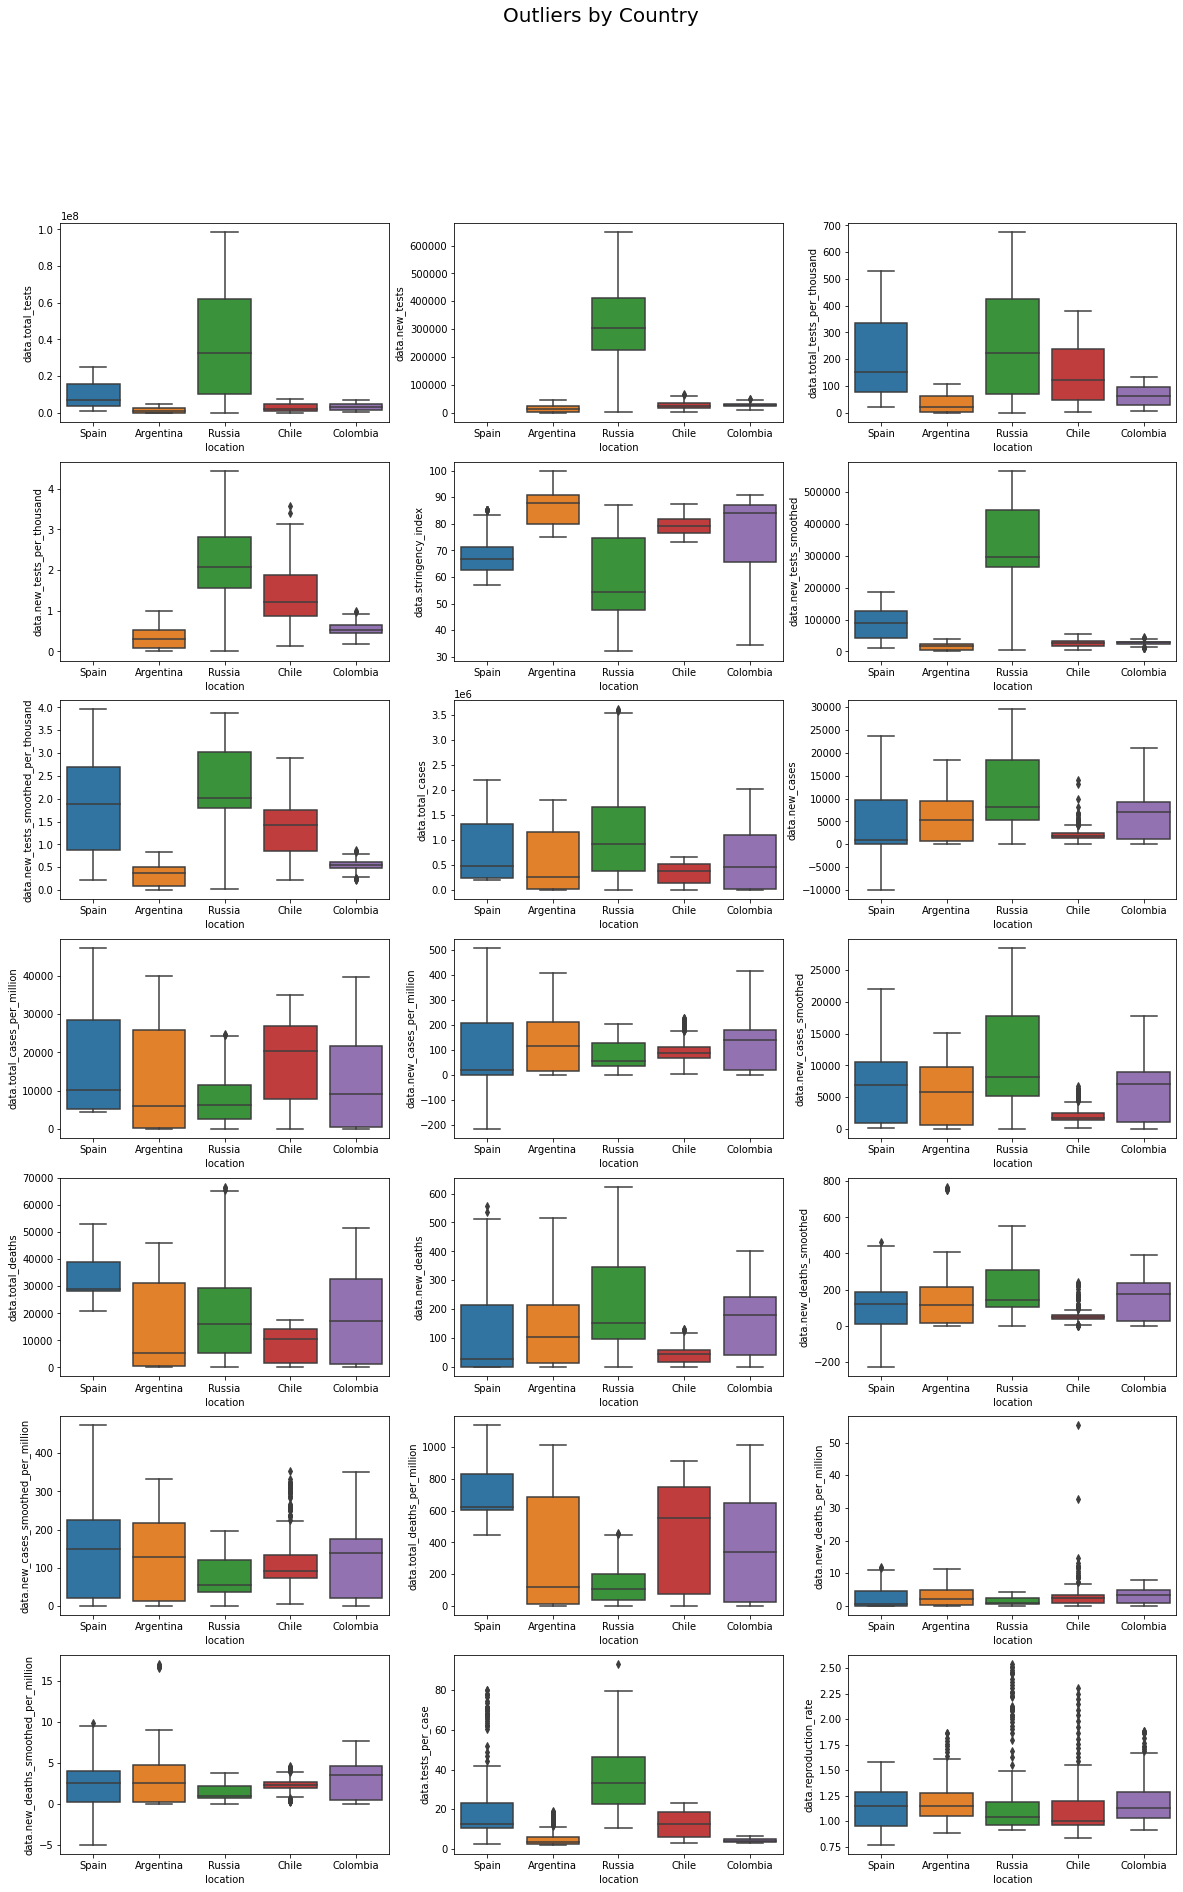

In [18]:
boxplots_per_country(covid,'CLEANED')

Option C: 8. Per country, which are the columns that are more related find the correlation between columns with the correlation matrix.

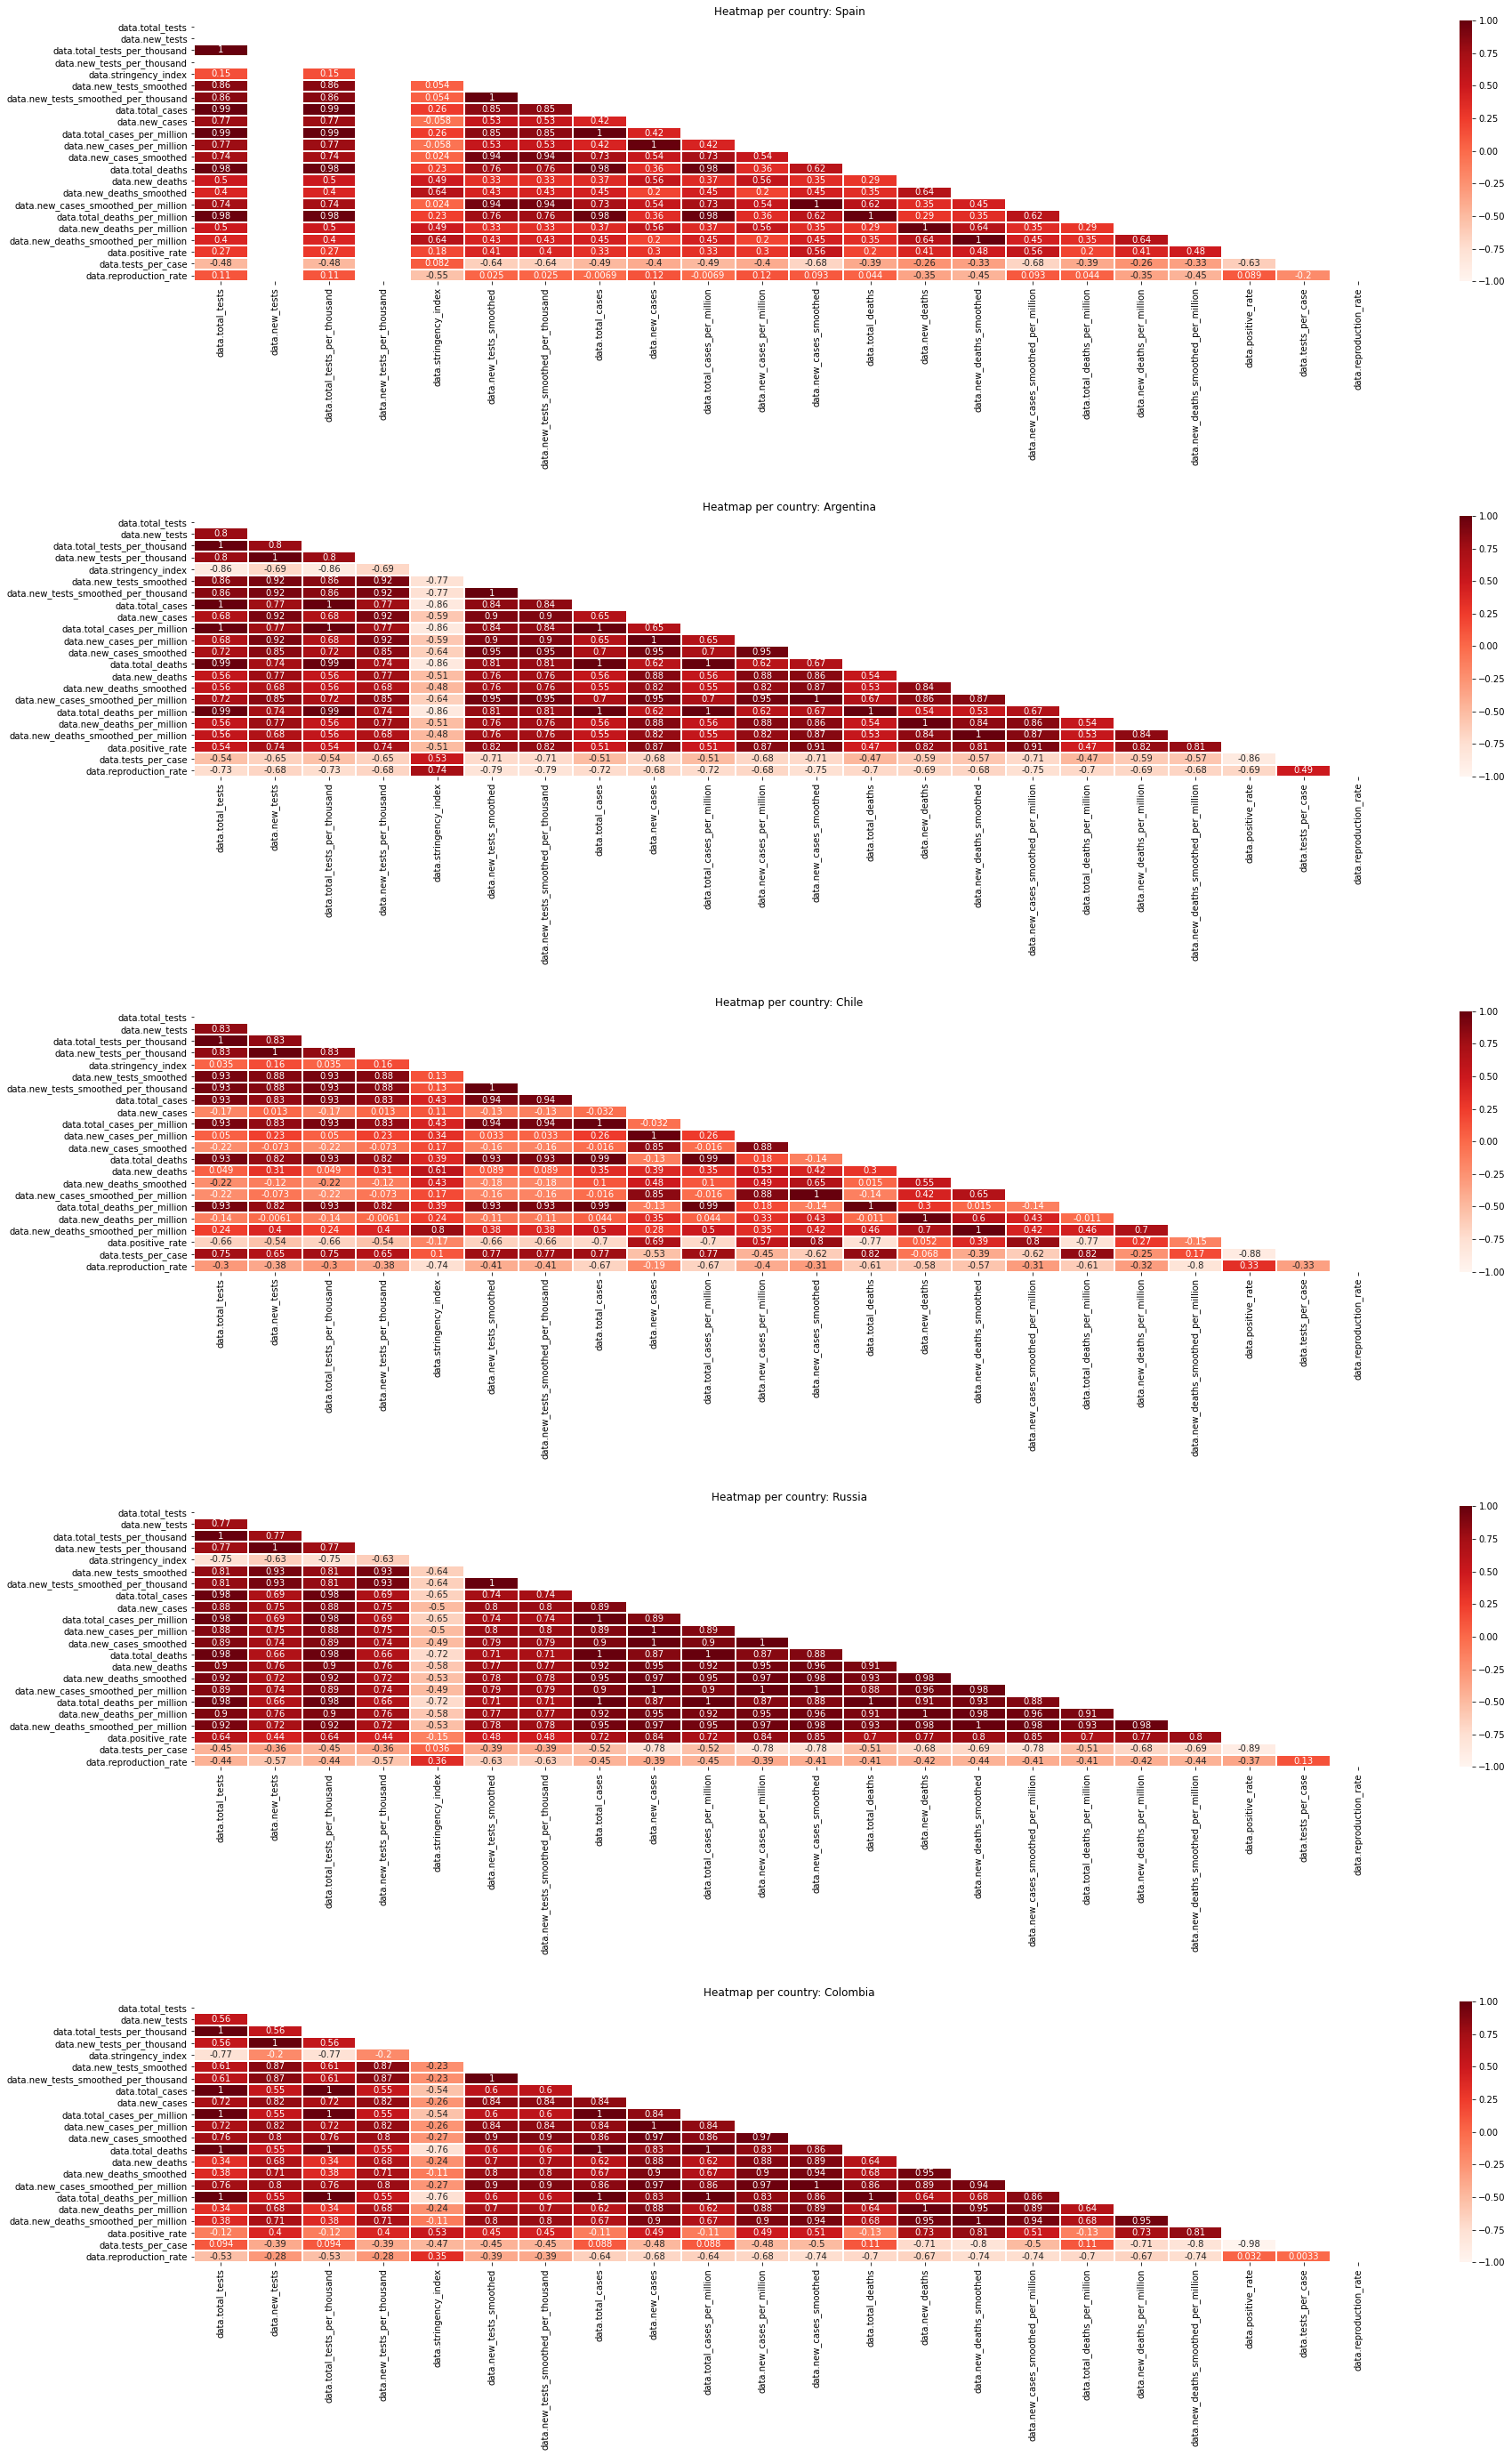

In [19]:
heatmap_per_country(covid)

In [20]:
columns_correlation_pivot(covid_chile,0.97,0.80)

Corr
column_1                                      
data.total_tests                      7.234279
data.total_tests_per_thousand         6.406972
data.new_tests                        5.870216
data.new_tests_per_thousand           5.043051
data.new_tests_smoothed_per_thousand  3.730819
data.new_tests_smoothed               3.730818
data.new_cases_per_million            1.767455
data.new_cases                        1.695517
data.positive_rate                    0.877237
data.total_deaths                     0.824487
data.total_deaths_per_million         0.824487
data.new_deaths_smoothed_per_million  0.803596
data.stringency_index                 0.800135

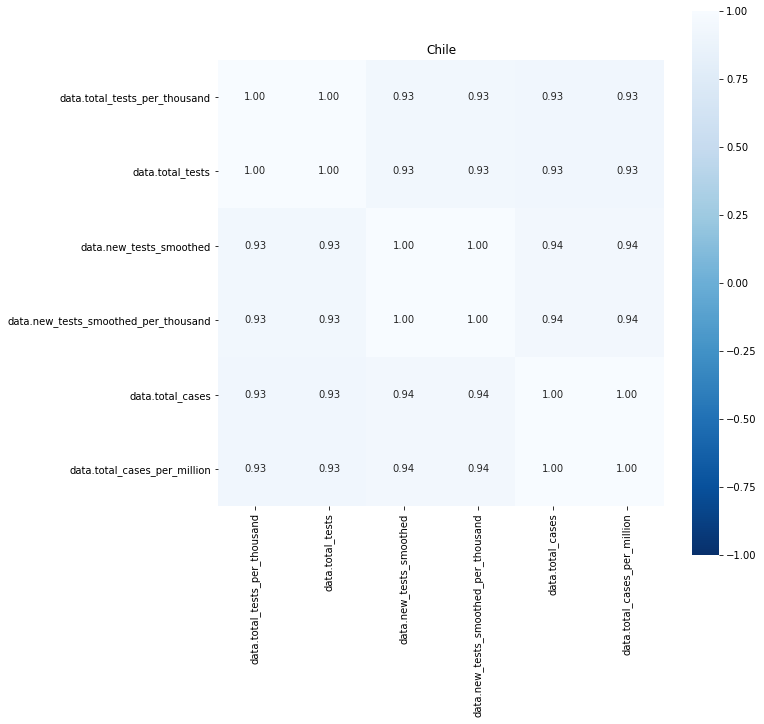

In [21]:
heatmap_with_column_filters(covid_chile,'Chile',
                            'data.total_tests_per_thousand',
                            'data.total_tests',
                            'data.new_tests_smoothed',
                            'data.new_tests_smoothed_per_thousand',
                            'data.total_cases',
                            'data.total_cases_per_million')

In [22]:
columns_correlation_pivot(covid_spain,0.97,0.80)

Corr
column_1                                      
data.new_tests_smoothed               3.582862
data.new_tests_smoothed_per_thousand  3.582825
data.total_tests_per_thousand         1.721805
data.total_tests                      1.721805

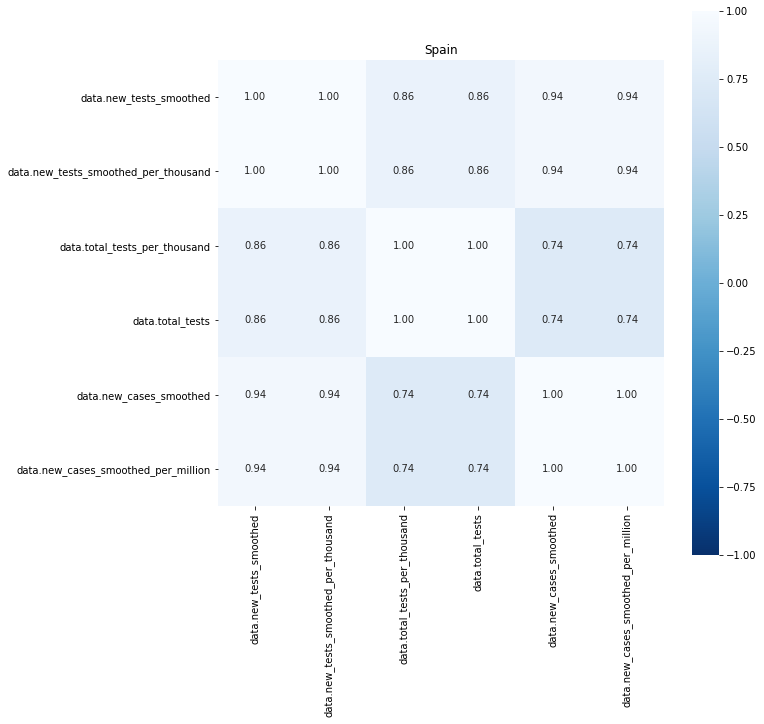

In [23]:
heatmap_with_column_filters(covid_spain,'Spain',
                            'data.new_tests_smoothed',
                            'data.new_tests_smoothed_per_thousand',
                            'data.total_tests_per_thousand',
                            'data.total_tests',
                            'data.new_cases_smoothed',
                            'data.new_cases_smoothed_per_million')

In [24]:
columns_correlation_pivot(covid_russia,0.97,0.80)

Corr
column_1                                      
data.total_tests_per_thousand         8.811792
data.total_tests                      8.811792
data.total_cases                      7.311152
data.new_cases                        7.296950
data.total_cases_per_million          6.424000
data.new_cases_per_million            6.409799
data.total_deaths                     4.575074
data.new_cases_smoothed               4.534922
data.new_cases_smoothed_per_million   2.691274
data.new_deaths                       1.872198
data.new_tests_per_thousand           1.868137
data.new_tests                        1.868133
data.total_deaths_per_million         1.845836
data.new_tests_smoothed               1.608059
data.new_tests_smoothed_per_thousand  1.608056
data.new_deaths_smoothed              0.933880
data.positive_rate                    0.894840

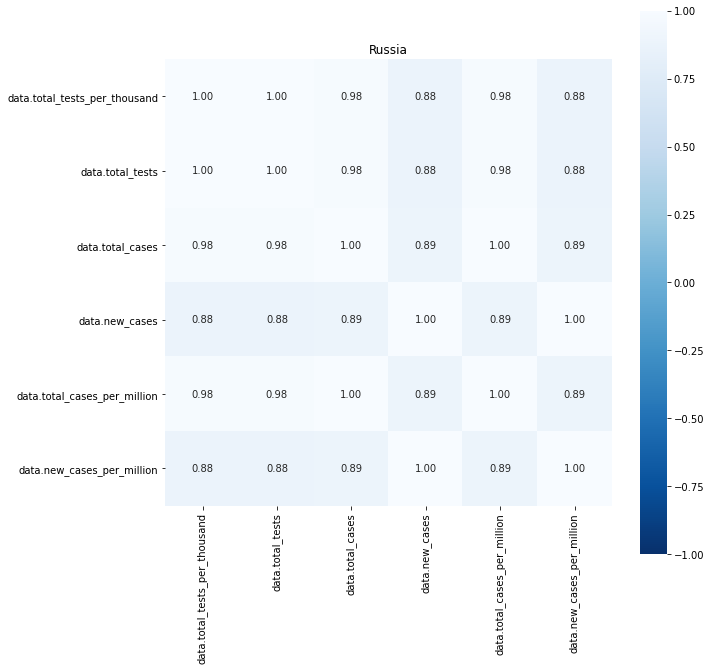

In [25]:
heatmap_with_column_filters(covid_russia,'Russia',
                            'data.total_tests_per_thousand',
                            'data.total_tests',
                            'data.total_cases',
                            'data.new_cases',
                            'data.total_cases_per_million',
                            'data.new_cases_per_million')

In [26]:
columns_correlation_pivot(covid_argentina,0.97,0.80)

Corr
column_1                                      
data.new_tests_smoothed_per_thousand  7.818666
data.new_tests_smoothed               7.818587
data.new_cases_per_million            6.140661
data.new_cases                        6.140661
data.new_tests                        5.377407
data.new_tests_per_thousand           5.377344
data.new_cases_smoothed               4.373127
data.stringency_index                 3.427933
data.new_deaths                       3.353027
data.new_cases_smoothed_per_million   2.643161
data.total_tests_per_thousand         2.588591
data.total_tests                      2.588590
data.new_deaths_smoothed              2.514097
data.new_deaths_per_million           1.654212
data.positive_rate                    0.864329
data.new_deaths_smoothed_per_million  0.810700

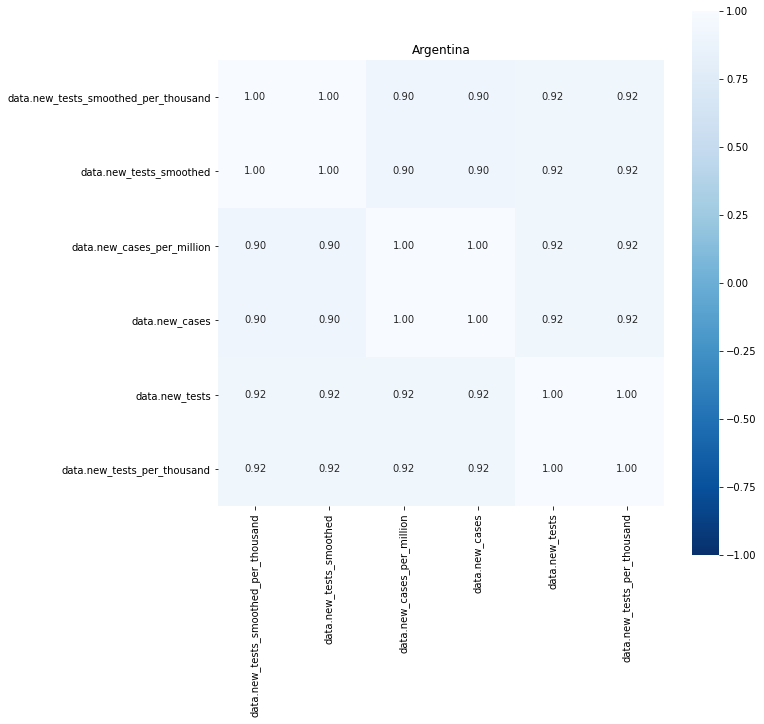

In [27]:
heatmap_with_column_filters(covid_argentina,'Argentina',
                            'data.new_tests_smoothed_per_thousand',
                            'data.new_tests_smoothed',
                            'data.new_cases_per_million',
                            'data.new_cases',
                            'data.new_tests',
                            'data.new_tests_per_thousand')

In [28]:
columns_correlation_pivot(covid_colombia,0.97,0.80)

Corr
column_1                                      
data.new_cases                        6.059853
data.new_cases_smoothed               5.376655
data.new_cases_per_million            5.224098
data.new_tests_smoothed               5.089019
data.new_tests_smoothed_per_thousand  5.088347
data.total_cases                      3.385838
data.new_tests                        3.363028
data.new_tests_per_thousand           3.362921
data.new_deaths                       2.792536
data.new_deaths_smoothed              2.702260
data.new_cases_smoothed_per_million   2.688326
data.total_cases_per_million          2.550082
data.new_deaths_per_million           0.950084
data.total_deaths                     0.858648
data.new_deaths_smoothed_per_million  0.814875

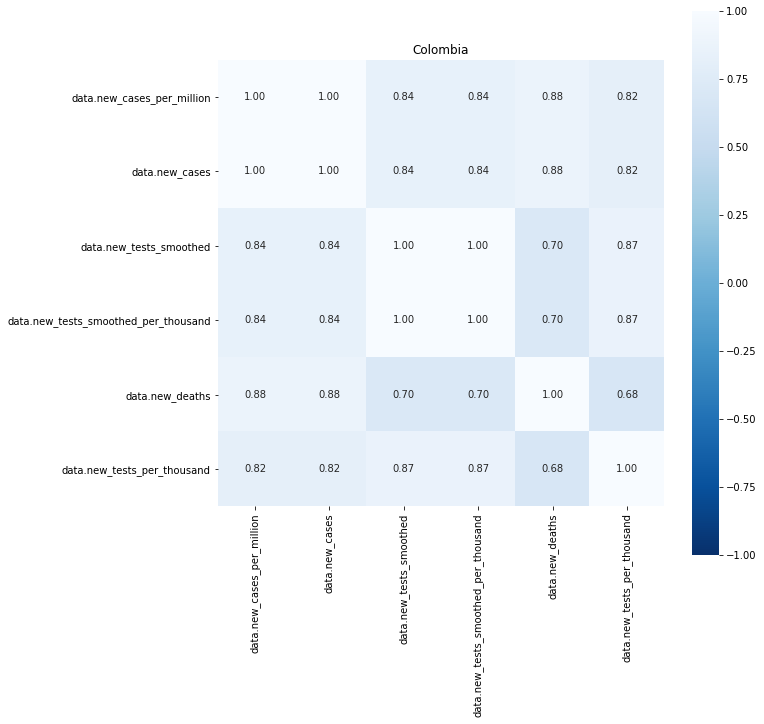

In [29]:
heatmap_with_column_filters(covid_colombia,'Colombia',
                            'data.new_cases_per_million',
                            'data.new_cases',
                            'data.new_tests_smoothed',
                            'data.new_tests_smoothed_per_thousand',
                            'data.new_deaths',
                            'data.new_tests_per_thousand')

In [30]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests                          400
data.new_tests_per_thousand             400
data.total_tests                        350
data.total_tests_per_thousand           350
data.tests_per_case                     178
data.new_tests_smoothed                 124
data.new_tests_smoothed_per_thousand    124
data.positive_rate                      123
data.tests_units                        110
data.reproduction_rate                   87
data.new_deaths_smoothed_per_million     67
data.new_cases_per_million               51
data.new_deaths                          49
data.stringency_index                    33
data.new_deaths_per_million              29
data.total_deaths                        24
data.total_deaths_per_million            24
data.new_cases                           22
data.new_cases_smoothed                   7
data.new_cases_smoothed_per_million       7
data.new_deaths_smoothed                  5
data.total_cases_per_million              0
population                      

OPTION C 6. Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot. If there is no alarm state, then show only the start date

In [31]:
covid.set_index('data.date', inplace=True)
covid

location  population  life_expectancy  data.total_tests  \
data.date                                                             
2020-04-20     Spain  46754783.0            83.56               NaN   
2020-04-21     Spain  46754783.0            83.56               NaN   
2020-04-22     Spain  46754783.0            83.56               NaN   
2020-04-23     Spain  46754783.0            83.56         1035522.0   
2020-04-24     Spain  46754783.0            83.56               NaN   
...              ...         ...              ...               ...   
2020-03-07  Colombia  50882884.0            77.29               NaN   
2020-03-08  Colombia  50882884.0            77.29               NaN   
2020-03-09  Colombia  50882884.0            77.29               NaN   
2020-03-10  Colombia  50882884.0            77.29               NaN   
2020-03-11  Colombia  50882884.0            77.29               NaN   

            data.new_tests  data.total_tests_per_thousand  \
data.date                                                   
2020-04-20             NaN                            NaN   
2020-04-21             NaN                            NaN   
2020-04-22             NaN                            NaN   
2020-04-23             NaN                         22.148   
2020-04-24             NaN                            NaN   
...                    ...                            ...   
2020-03-07             NaN                            NaN   
2020-03-08             NaN                            NaN   
2020-03-09             NaN                            NaN   
2020-03-10             NaN                            NaN   
2020-03-11             NaN                            NaN   

            data.new_tests_per_thousand data.tests_units  \
data.date                                                  
2020-04-20                          NaN  tests performed   
2020-04-21                          NaN  tests performed   
2020-04-22                          NaN  tests performed   
2020-04-23                          NaN  tests performed   
2020-04-24                          NaN  tests performed   
...                                 ...              ...   
2020-03-07                          NaN              NaN   
2020-03-08                          NaN              NaN   
2020-03-09                          NaN              NaN   
2020-03-10                          NaN              NaN   
2020-03-11                          NaN              NaN   

            data.stringency_index  data.new_tests_smoothed  ...  \
data.date                                                   ...   
2020-04-20                  85.19                  10529.0  ...   
2020-04-21                  85.19                  10529.0  ...   
2020-04-22                  85.19                  10529.0  ...   
2020-04-23                  85.19                  10529.0  ...   
2020-04-24                  85.19                  15466.0  ...   
...                           ...                      ...  ...   
2020-03-07                    NaN                      NaN  ...   
2020-03-08                    NaN                      NaN  ...   
2020-03-09                    NaN                      NaN  ...   
2020-03-10                    NaN                      NaN  ...   
2020-03-11                    NaN                      NaN  ...   

            data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
data.date                                                                  
2020-04-20            20852.0            399.0                   442.286   
2020-04-21            21282.0            430.0                   460.857   
2020-04-22            21717.0            435.0                   429.857   
2020-04-23            22157.0            440.0                   406.000   
2020-04-24            22524.0            367.0                   360.286   
...                       ...              ...                       ...   
2020-03-07                NaN    

location                  5
data.stringency_index    54
dtype: int64
------
Colombia     319
Russia       317
Argentina    305
Chile        299
Spain        257
Name: location, dtype: int64
------
------


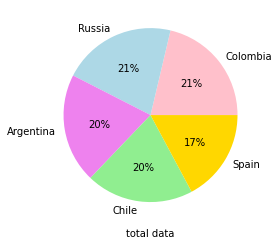

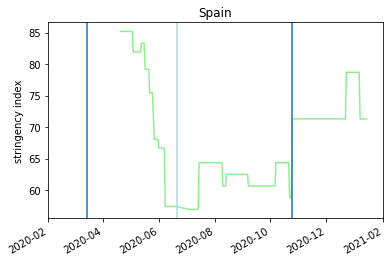

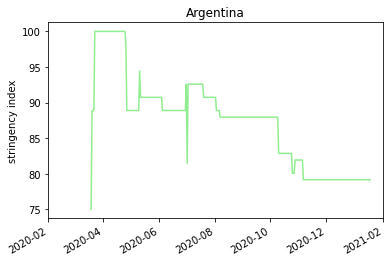

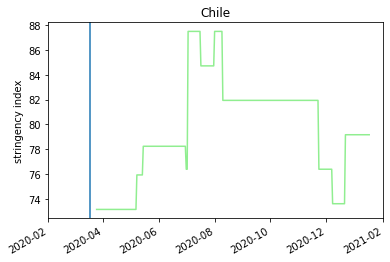

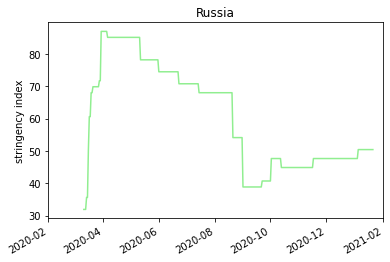

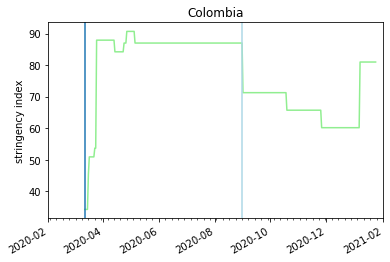

In [33]:
plot_clean_columns(df_name=covid, column_1='data.stringency_index', y_label='stringency index') # mejor si no quitamos outliers

location                                  5
data.new_cases_per_million             1362
data.new_cases_smoothed_per_million    1393
dtype: int64
------
Colombia     319
Russia       316
Argentina    309
Chile        273
Spain        184
Name: location, dtype: int64
------
------


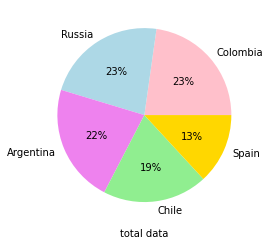

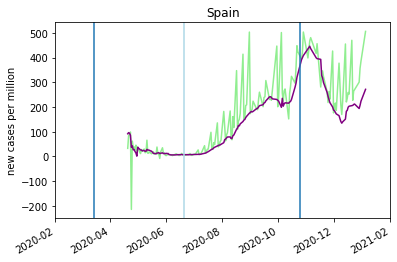

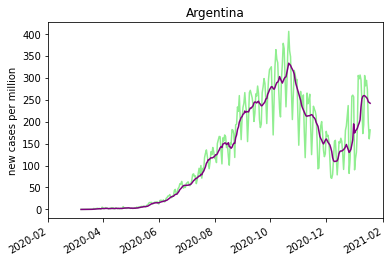

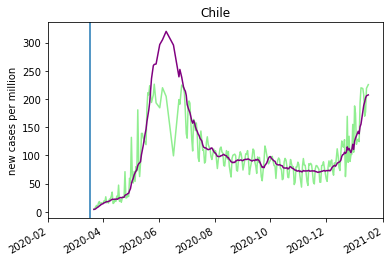

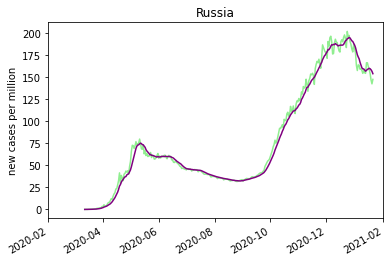

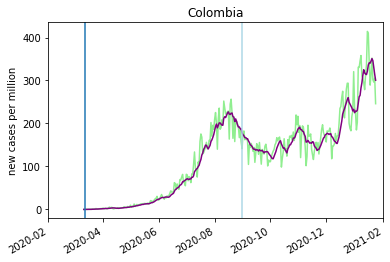

In [34]:
plot_clean_columns(df_name=covid, column_1='data.new_cases_per_million', column_2='data.new_cases_smoothed_per_million', y_label='new cases per million')

location                           5
data.total_cases_per_million    1454
dtype: int64
------
Colombia     325
Russia       317
Argentina    316
Chile        302
Spain        270
Name: location, dtype: int64
------
------


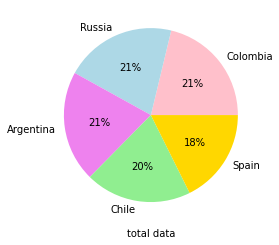

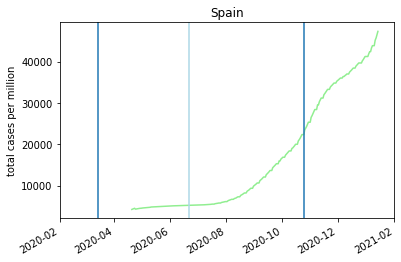

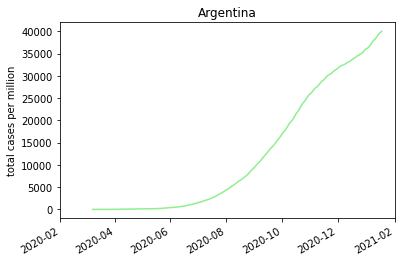

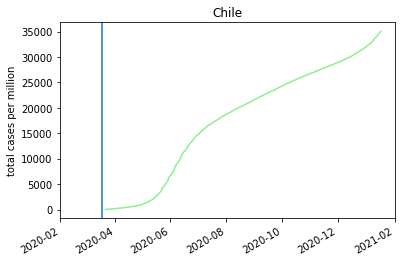

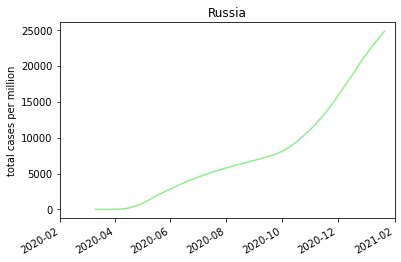

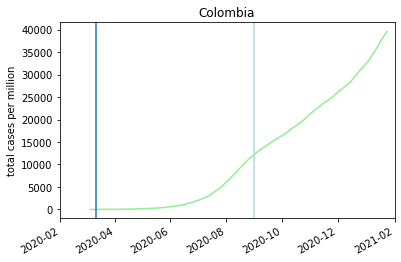

In [35]:
plot_clean_columns(df_name=covid, column_1='data.total_cases_per_million', y_label='total cases per million')

location                            5
data.total_deaths_per_million    1397
dtype: int64
------
Argentina    316
Russia       309
Colombia     309
Chile        302
Spain        270
Name: location, dtype: int64
------
------


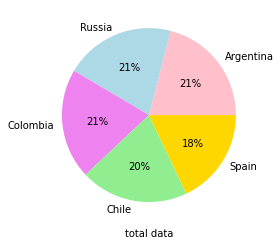

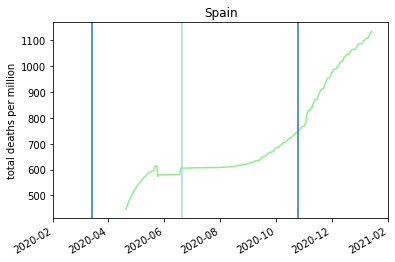

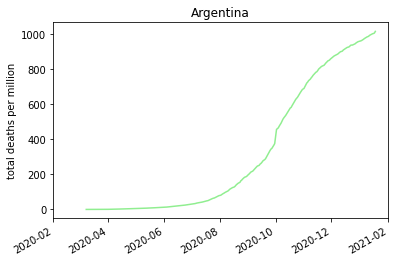

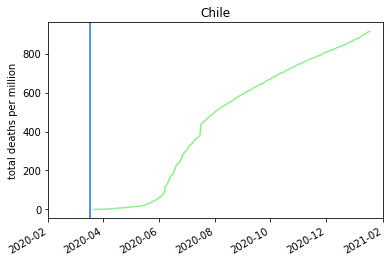

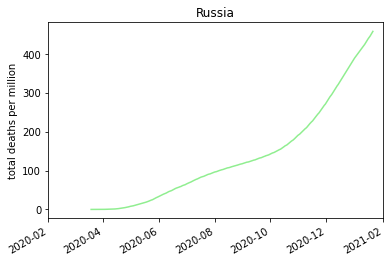

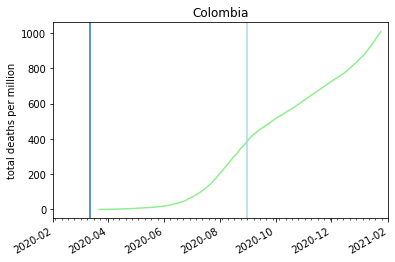

In [36]:
plot_clean_columns(df_name=covid, column_1='data.total_deaths_per_million', y_label='total deaths per million')

location                                   5
data.new_deaths_per_million              765
data.new_deaths_smoothed_per_million    1087
dtype: int64
------
Argentina    303
Russia       302
Colombia     302
Chile        238
Spain        187
Name: location, dtype: int64
------
------


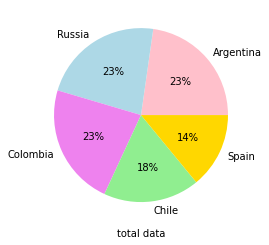

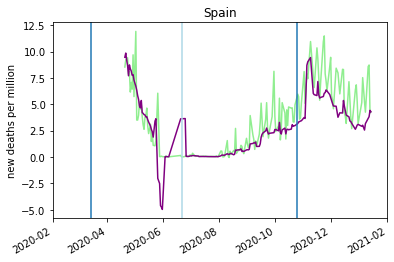

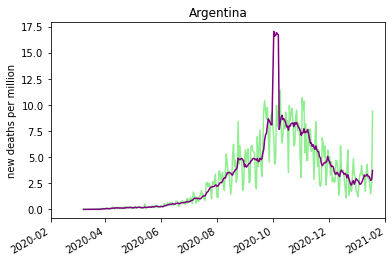

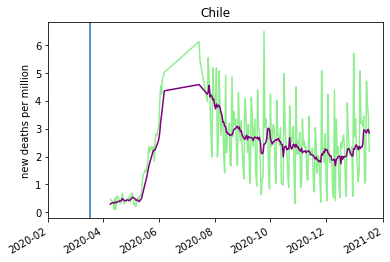

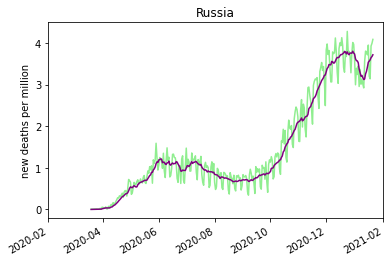

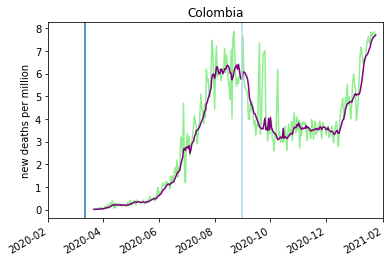

In [37]:
plot_clean_columns(df_name=covid, column_1='data.new_deaths_per_million', column_2='data.new_deaths_smoothed_per_million', y_label='new deaths per million')

location                    5
data.reproduction_rate    134
dtype: int64
------
Russia       297
Colombia     296
Chile        293
Argentina    293
Spain        264
Name: location, dtype: int64
------
------


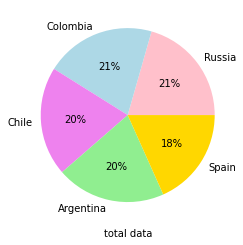

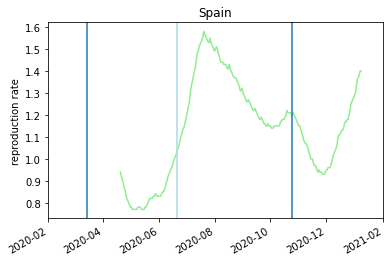

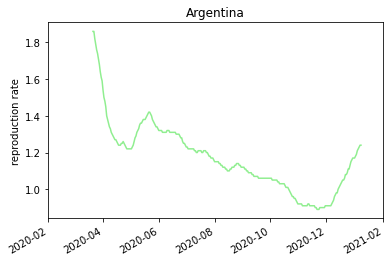

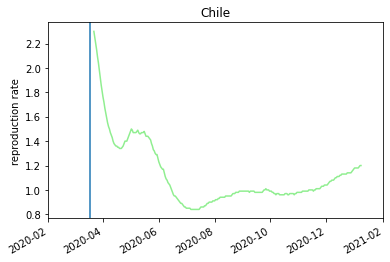

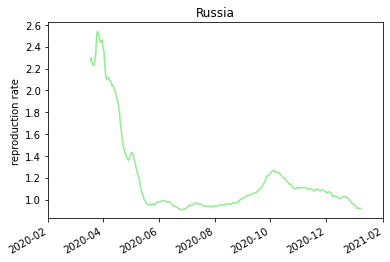

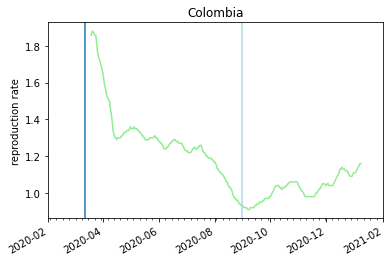

In [38]:
plot_clean_columns(df_name=covid, column_1='data.reproduction_rate', y_label='reproduction rate')

location                5
data.positive_rate    396
dtype: int64
------
Russia       317
Argentina    314
Chile        282
Spain        270
Colombia     224
Name: location, dtype: int64
------
------


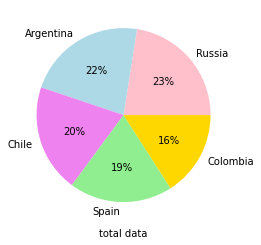

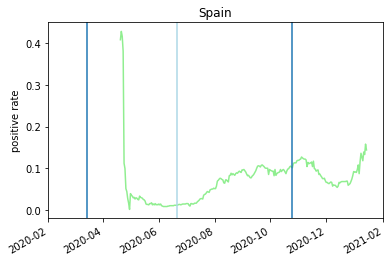

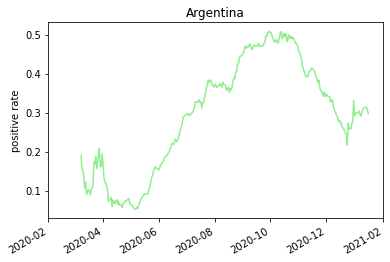

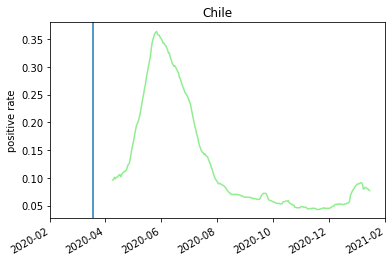

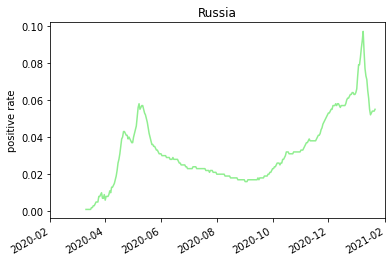

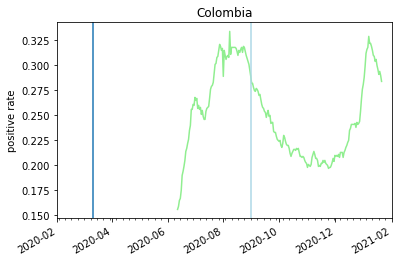

In [39]:
plot_clean_columns(df_name=covid, column_1='data.positive_rate', y_label='positive rate')

location                 5
data.tests_per_case    393
dtype: int64
------
Argentina    314
Russia       290
Chile        282
Spain        242
Colombia     224
Name: location, dtype: int64
------
------


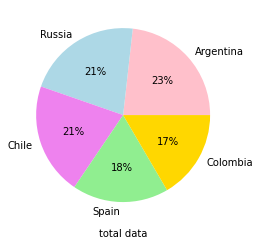

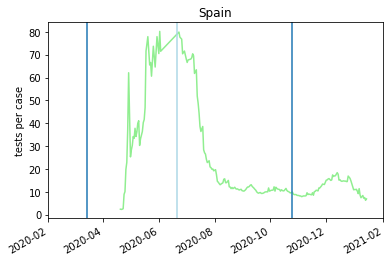

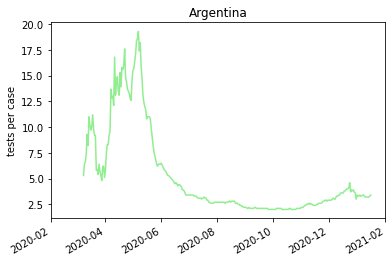

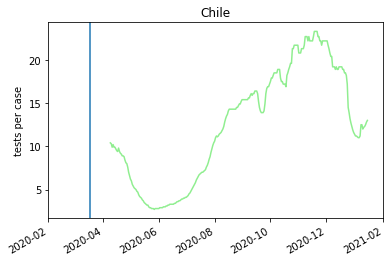

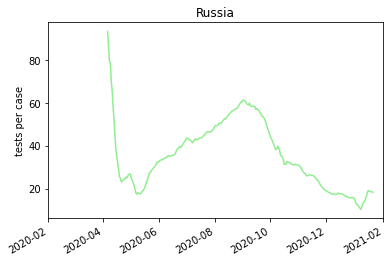

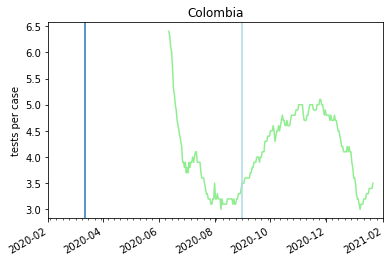

In [40]:
plot_clean_columns(df_name=covid, column_1='data.tests_per_case', y_label='tests per case')

location                            5
data.total_tests_per_thousand    1174
dtype: int64
------
Argentina    314
Russia       309
Chile        284
Colombia     234
Spain         39
Name: location, dtype: int64
------
------


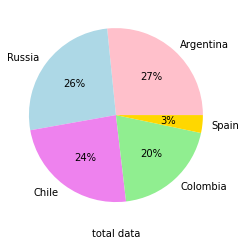

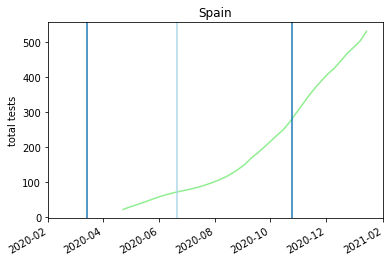

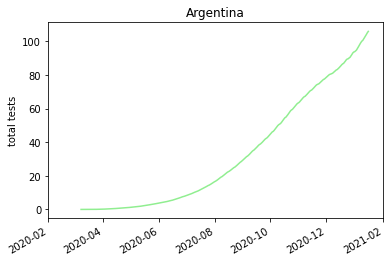

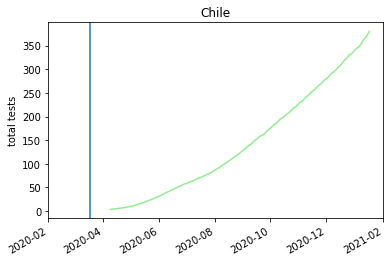

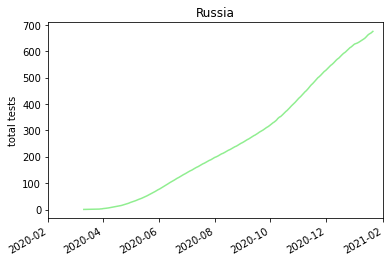

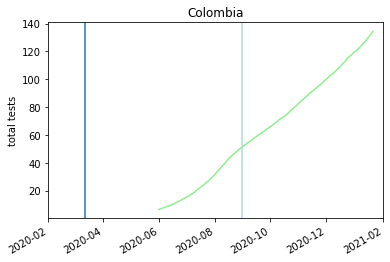

In [41]:
plot_clean_columns(df_name=covid, column_1='data.total_tests_per_thousand', y_label='total tests')

location                                  4
data.new_tests_per_thousand             895
data.new_tests_smoothed_per_thousand    826
dtype: int64
------
Argentina    310
Russia       301
Chile        277
Colombia     228
Name: location, dtype: int64
------
------


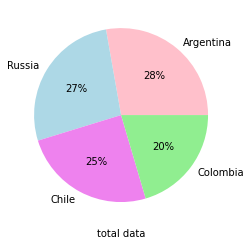

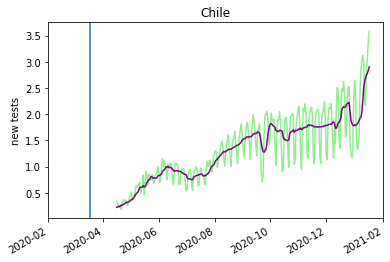

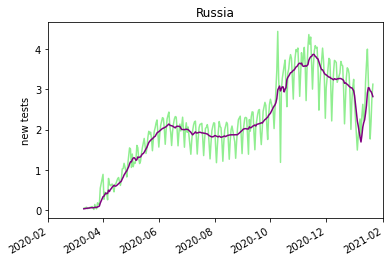

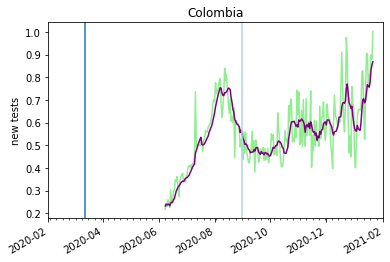

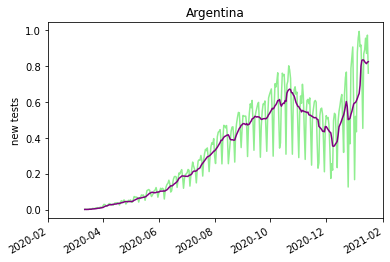

In [42]:
plot_clean_columns(df_name=covid, column_1='data.new_tests_per_thousand', column_2='data.new_tests_smoothed_per_thousand', y_label='new tests')

OPTION C: 10. Answer the questions:
    a. What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?

In [43]:
#Agrupamos las columnas que nos interesan
covid_position= group(dt=data_complete_clean(), col1="location", col2="data.total_cases_per_million",col3= "data.total_deaths_per_million", col4="life_expectancy")
covid_position

data.total_cases_per_million  data.total_deaths_per_million  \
location                                                                   
Afghanistan                    746.909943                      29.296417   
Albania                       5705.979472                     128.573672   
Algeria                        888.310857                      31.839191   
Andorra                      35155.526954                     737.301916   
Angola                         174.742740                       4.740911   
...                                   ...                            ...   
Vietnam                          7.142571                       0.332101   
World                         3421.052593                      94.095024   
Yemen                           50.049817                      15.351170   
Zambia                         555.092125                      11.871312   
Zimbabwe                       410.067968                      11.282065   

             life_expectancy  
location                      
Afghanistan            64.83  
Albania                78.57  
Algeria                76.88  
Andorra                83.73  
Angola                 61.15  
...                      ...  
Vietnam                75.40  
World                  72.58  
Yemen                  66.12  
Zambia                 63.89  
Zimbabwe               61.49  

[192 rows x 3 columns]

In [44]:
#Filtramos y ordenamos cada columna por orden para comprobar la posicion que ocupan nuestros paises
cases_col= sort_columns(dt=covid_position, col_name="data.total_cases_per_million")
deaths_col = sort_columns(dt=covid_position, col_name="data.total_deaths_per_million")
life_col = sort_columns(dt=covid_position, col_name="life_expectancy")

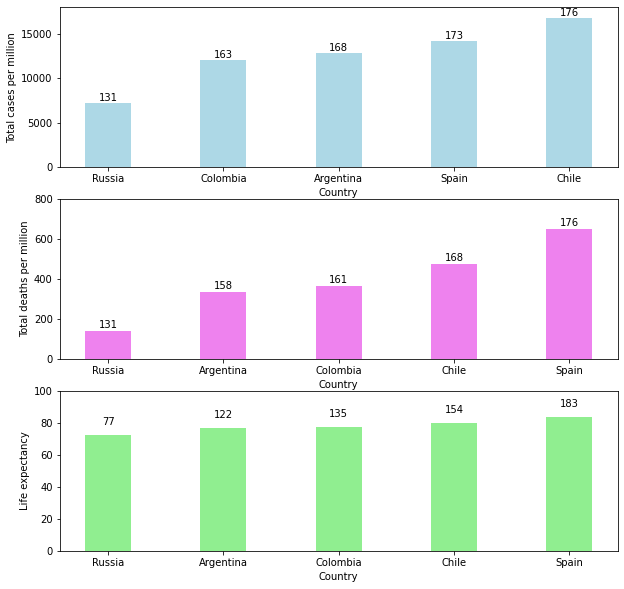

In [45]:
#Representamos nuestros paises, respecto al total 
position_countries(dt1=cases_col, dt2=deaths_col, dt3= life_col)

In [46]:
covid= covid.reset_index()
covid

data.date  location  population  life_expectancy  data.total_tests  \
0    2020-04-20     Spain  46754783.0            83.56               NaN   
1    2020-04-21     Spain  46754783.0            83.56               NaN   
2    2020-04-22     Spain  46754783.0            83.56               NaN   
3    2020-04-23     Spain  46754783.0            83.56         1035522.0   
4    2020-04-24     Spain  46754783.0            83.56               NaN   
...         ...       ...         ...              ...               ...   
1525 2020-03-07  Colombia  50882884.0            77.29               NaN   
1526 2020-03-08  Colombia  50882884.0            77.29               NaN   
1527 2020-03-09  Colombia  50882884.0            77.29               NaN   
1528 2020-03-10  Colombia  50882884.0            77.29               NaN   
1529 2020-03-11  Colombia  50882884.0            77.29               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                NaN                            NaN   
1                NaN                            NaN   
2                NaN                            NaN   
3                NaN                         22.148   
4                NaN                            NaN   
...              ...                            ...   
1525             NaN                            NaN   
1526             NaN                            NaN   
1527             NaN                            NaN   
1528             NaN                            NaN   
1529             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             NaN  tests performed                  85.19   
1                             NaN  tests performed                  85.19   
2                             NaN  tests performed                  85.19   
3                             NaN  tests performed                  85.19   
4                             NaN  tests performed                  85.19   
...                           ...              ...                    ...   
1525                          NaN              NaN                    NaN   
1526                          NaN              NaN                    NaN   
1527                          NaN              NaN                    NaN   
1528                          NaN              NaN                    NaN   
1529                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...            20852.0            399.0                   442.286   
1     ...            21282.0            430.0                   460.857   
2     ...            21717.0            435.0                   429.857   
3     ...            22157.0            440.0                   406.000   
4     ...            22524.0            367.0                   360.286   
...   ...                ...              ...                       ...   
1525  ...                NaN              NaN                       NaN   
1526  ...                NaN              NaN                       NaN   
1527  ...                NaN              NaN                       NaN   
1528  ...                NaN              NaN                       NaN   
1529  ...                NaN              NaN                     0.000   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                  92.003                        445.986   
1                                  96.665                        455.183   
2                                  93.940                        464.487   
3                                  85.785                        473.898   
4                                  37.127                        481.748   
...                                   ...                            ...   
1525                                  NaN                            NaN  

Option B 2. Create with bars, lines, points and pie charts the daily deaths and infected.

(<AxesSubplot:xlabel='Date', ylabel='Daily cases per million'>,
 <AxesSubplot:xlabel='Date', ylabel='Daily deaths per million'>)

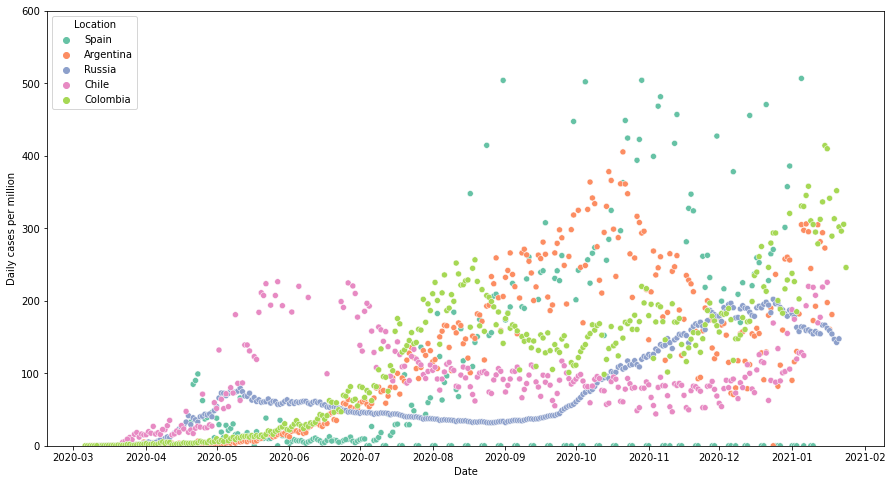

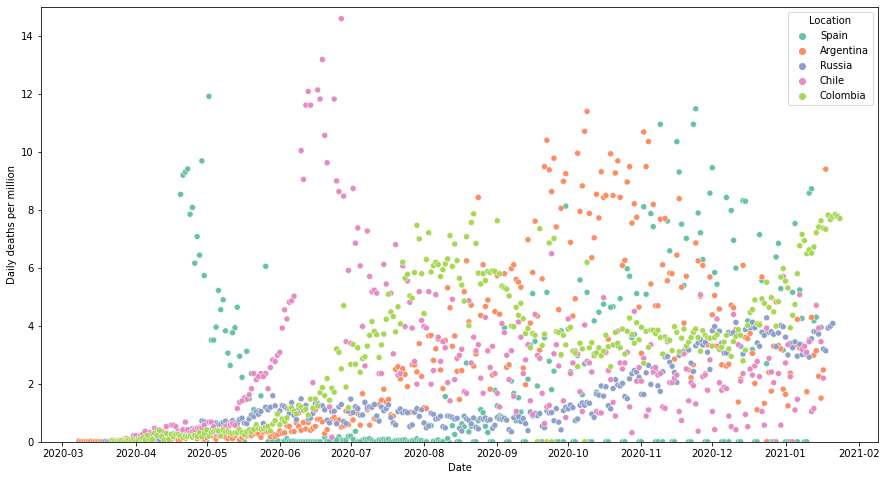

In [47]:
from utils.visualization_tb import daily_deaths_cases, daily_deaths_cases2, daily_deaths_cases3, daily_deaths_cases4
daily_deaths_cases(dt=covid)


(<AxesSubplot:xlabel='Date', ylabel='Daily cases per million'>,
 <AxesSubplot:xlabel='Date', ylabel='Daily deaths per million'>)

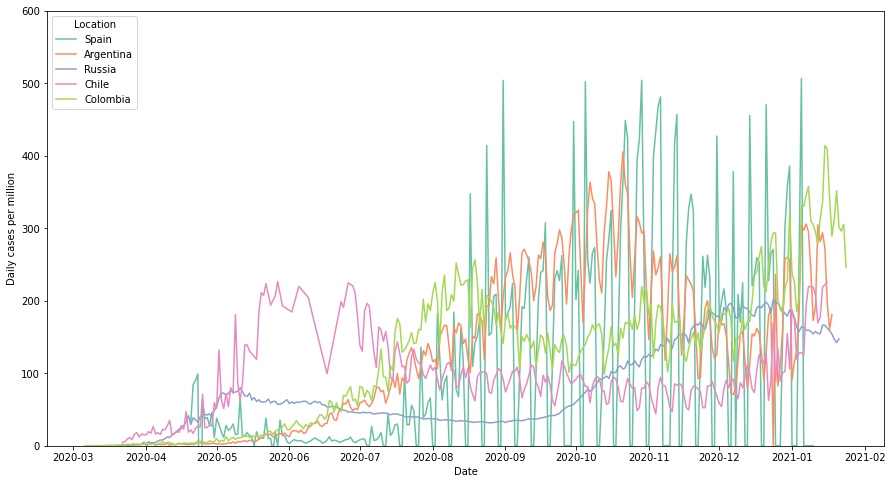

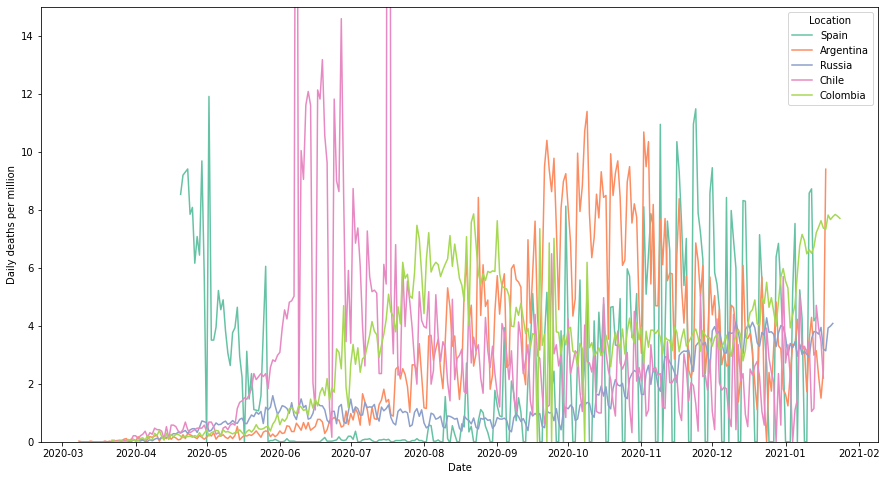

In [48]:
daily_deaths_cases2(dt=covid)

Text(0, 0.5, '')

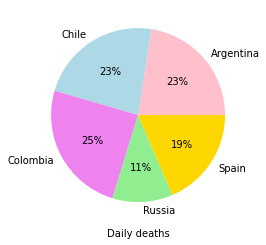

In [49]:
daily_deaths_cases4(dt=covid, col_name="data.new_deaths_per_million", title="Daily deaths")

Text(0, 0.5, '')

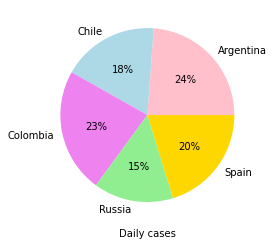

In [50]:
daily_deaths_cases4(dt=covid, col_name="data.new_cases_per_million", title="Daily cases")

OPTION B 4. When are the worst moments to go to the countries? Answer this referring to the “per_million” columns.

In [51]:
dont_travel=pivot_table_from_df(covid,'data.new_cases_per_million','data.total_cases_per_million','data.total_deaths_per_million')
dont_travel

data.date   location  data.new_cases_per_million  \
0    2020-03-06   Colombia                       0.020   
1    2020-03-07   Colombia                       0.000   
2    2020-03-08  Argentina                       0.089   
3    2020-03-08   Colombia                       0.000   
4    2020-03-09  Argentina                       0.000   
...         ...        ...                         ...   
1525 2021-01-21   Colombia                     301.988   
1526 2021-01-21     Russia                     147.628   
1527 2021-01-22   Colombia                     296.229   
1528 2021-01-23   Colombia                     305.623   
1529 2021-01-24   Colombia                     245.977   

      data.total_cases_per_million  data.total_deaths_per_million  
0                            0.020                            NaN  
1                            0.020                            NaN  
2                            0.266                          0.022  
3                            0.020                            NaN  
4                            0.266                          0.022  
...                            ...                            ...  
1525                     38762.445                        986.324  
1526                     24782.906                        457.808  
1527                     39058.674                        994.165  
1528                     39364.298                       1001.948  
1529                     39610.274                       1009.652  

[1530 rows x 5 columns]

In [52]:
dont_travel_to(dont_travel,'data.new_cases_per_million') 

*************************************
Don't travel to: 
['Spain']

On:
[Timestamp('2021-01-05 00:00:00')]

data.new_cases_per_million
[506.9]

*************************************
Don't travel to: 
['Argentina']

On:
[Timestamp('2020-10-21 00:00:00')]

data.new_cases_per_million
[405.48]

*************************************
Don't travel to: 
['Chile']

On:
[Timestamp('2020-05-27 00:00:00')]

data.new_cases_per_million
[226.405]

*************************************
Don't travel to: 
['Russia']

On:
[Timestamp('2020-12-24 00:00:00')]

data.new_cases_per_million
[202.139]

*************************************
Don't travel to: 
['Colombia']

On:
[Timestamp('2021-01-15 00:00:00')]

data.new_cases_per_million
[414.245]



In [54]:
plotly_dont_travel_to(dont_travel,'data.new_cases_per_million','Total new cases per million')

In [55]:
dont_travel_to(dont_travel,'data.total_cases_per_million') 

*************************************
Don't travel to: 
['Spain']

On:
[Timestamp('2021-01-14 00:00:00')]

data.total_cases_per_million
[47309.962]

*************************************
Don't travel to: 
['Argentina']

On:
[Timestamp('2021-01-18 00:00:00')]

data.total_cases_per_million
[39991.081]

*************************************
Don't travel to: 
['Chile']

On:
[Timestamp('2021-01-17 00:00:00')]

data.total_cases_per_million
[35040.002]

*************************************
Don't travel to: 
['Russia']

On:
[Timestamp('2021-01-21 00:00:00')]

data.total_cases_per_million
[24782.906]

*************************************
Don't travel to: 
['Colombia']

On:
[Timestamp('2021-01-24 00:00:00')]

data.total_cases_per_million
[39610.274]



In [56]:
plotly_dont_travel_to(dont_travel,'data.total_cases_per_million','Total cases per million')